In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.callbacks import *

In [5]:
imagePaths = []
for dirname, _, filenames in os.walk('Imagens_n_Segmentadas'):
    for filename in filenames:
        imagePaths.append(os.path.join(dirname, filename))

In [6]:
 len(imagePaths)

5328

In [7]:
 imagePaths[0]

'Imagens_n_Segmentadas\\grave\\G1.png'

In [17]:
#Taking the images from the folder and resizing to 128x128 RGB
#labeling them from ['healthy', 'mild', 'moderate', 'severe'] to -> [0,1,2,3]
new_img_height = 128
new_img_width = 128
channels = 3
all_labels = ['normal', 'leve', 'moderado', 'grave']
original_data_x = []
original_data_y = []
for imagePath in tqdm(imagePaths):
    st = imagePath.split(os.path.sep)[-1]
    result = st.endswith('png')
    if result == False:
        continue
    #print("st = ", st)
#     if imagePath.split(os.path.sep)[-1].endswith("png") == False':
#         continue
    label = all_labels.index(imagePath.split(os.path.sep)[1])
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (new_img_height, new_img_width))
    original_data_x.append(image)
    original_data_y.append(label)

  1%|█                                                                              | 74/5328 [00:00<00:14, 361.66it/s]

st =  G1.png
st =  G10.png
st =  G11.png
st =  G12.png
st =  G13.png
st =  G14.png
st =  G15.png
st =  G16.png
st =  G17.png
st =  G18.png
st =  G19.png
st =  G2.png
st =  G20.png
st =  G21.png
st =  G22.png
st =  G23.png
st =  G24.png
st =  G25.png
st =  G26.png
st =  G27.png
st =  G28.png
st =  G29.png
st =  G3.png
st =  G30.png
st =  G31.png
st =  G32.png
st =  G33.png
st =  G34.png
st =  G35.png
st =  G36.png
st =  G37.png
st =  G38.png
st =  G39.png
st =  G4.png
st =  G40.png
st =  G41.png
st =  G42.png
st =  G43.png
st =  G44.png
st =  G45.png
st =  G46.png
st =  G47.png
st =  G48.png
st =  G49.png
st =  G5.png
st =  G50.png
st =  G51.png
st =  G52.png
st =  G53.png
st =  G54.png
st =  G55.png
st =  G56.png
st =  G57.png
st =  G58.png
st =  G59.png
st =  G6.png
st =  G60.png
st =  G61.png
st =  G62.png
st =  G63.png
st =  G64.png
st =  G65.png
st =  G66.png
st =  G67.png
st =  G68.png
st =  G69.png
st =  G7.png
st =  G70.png
st =  G71.png
st =  G72.png
st =  G73.png
st =  G74.png

  3%|██▌                                                                           | 171/5328 [00:00<00:08, 629.40it/s]

st =  GADF1.png
st =  GADF10.png
st =  GADF11.png
st =  GADF12.png
st =  GADF13.png
st =  GADF14.png
st =  GADF15.png
st =  GADF16.png
st =  GADF17.png
st =  GADF18.png
st =  GADF19.png
st =  GADF2.png
st =  GADF20.png
st =  GADF21.png
st =  GADF22.png
st =  GADF23.png
st =  GADF24.png
st =  GADF25.png
st =  GADF26.png
st =  GADF27.png
st =  GADF28.png
st =  GADF29.png
st =  GADF3.png
st =  GADF30.png
st =  GADF31.png
st =  GADF32.png
st =  GADF33.png
st =  GADF34.png
st =  GADF35.png
st =  GADF36.png
st =  GADF37.png
st =  GADF38.png
st =  GADF39.png
st =  GADF4.png
st =  GADF40.png
st =  GADF41.png
st =  GADF42.png
st =  GADF43.png
st =  GADF44.png
st =  GADF45.png
st =  GADF46.png
st =  GADF47.png
st =  GADF48.png
st =  GADF49.png
st =  GADF5.png
st =  GADF50.png
st =  GADF51.png
st =  GADF52.png


  4%|███▍                                                                          | 234/5328 [00:00<00:13, 377.43it/s]

st =  GADF53.png
st =  GADF54.png
st =  GADF55.png
st =  GADF56.png
st =  GADF57.png
st =  GADF58.png
st =  GADF59.png
st =  GADF6.png
st =  GADF60.png
st =  GADF61.png
st =  GADF62.png
st =  GADF63.png
st =  GADF64.png
st =  GADF65.png
st =  GADF66.png
st =  GADF67.png
st =  GADF68.png
st =  GADF69.png
st =  GADF7.png
st =  GADF70.png
st =  GADF71.png
st =  GADF72.png
st =  GADF73.png
st =  GADF74.png
st =  GADF8.png
st =  GADF9.png
st =  GASF1.png
st =  GASF10.png
st =  GASF11.png
st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png


  5%|████▏                                                                         | 282/5328 [00:00<00:15, 317.42it/s]

st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png
st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png


  6%|████▋                                                                         | 321/5328 [00:00<00:18, 271.90it/s]

st =  GASF9.png
st =  GRAYGADFEucl1.png
st =  GRAYGADFEucl10.png
st =  GRAYGADFEucl11.png
st =  GRAYGADFEucl12.png
st =  GRAYGADFEucl13.png
st =  GRAYGADFEucl14.png
st =  GRAYGADFEucl15.png
st =  GRAYGADFEucl16.png
st =  GRAYGADFEucl17.png
st =  GRAYGADFEucl18.png
st =  GRAYGADFEucl19.png
st =  GRAYGADFEucl2.png
st =  GRAYGADFEucl20.png
st =  GRAYGADFEucl21.png
st =  GRAYGADFEucl22.png
st =  GRAYGADFEucl23.png
st =  GRAYGADFEucl24.png
st =  GRAYGADFEucl25.png
st =  GRAYGADFEucl26.png
st =  GRAYGADFEucl27.png
st =  GRAYGADFEucl28.png
st =  GRAYGADFEucl29.png
st =  GRAYGADFEucl3.png
st =  GRAYGADFEucl30.png
st =  GRAYGADFEucl31.png
st =  GRAYGADFEucl32.png
st =  GRAYGADFEucl33.png
st =  GRAYGADFEucl34.png
st =  GRAYGADFEucl35.png
st =  GRAYGADFEucl36.png
st =  GRAYGADFEucl37.png
st =  GRAYGADFEucl38.png
st =  GRAYGADFEucl39.png
st =  GRAYGADFEucl4.png
st =  GRAYGADFEucl40.png
st =  GRAYGADFEucl41.png
st =  GRAYGADFEucl42.png
st =  GRAYGADFEucl43.png
st =  GRAYGADFEucl44.png
st =  GRAYGAD

  7%|█████▌                                                                        | 382/5328 [00:01<00:19, 252.58it/s]

st =  GRAYGADFEucl49.png
st =  GRAYGADFEucl5.png
st =  GRAYGADFEucl50.png
st =  GRAYGADFEucl51.png
st =  GRAYGADFEucl52.png
st =  GRAYGADFEucl53.png
st =  GRAYGADFEucl54.png
st =  GRAYGADFEucl55.png
st =  GRAYGADFEucl56.png
st =  GRAYGADFEucl57.png
st =  GRAYGADFEucl58.png
st =  GRAYGADFEucl59.png
st =  GRAYGADFEucl6.png
st =  GRAYGADFEucl60.png
st =  GRAYGADFEucl61.png
st =  GRAYGADFEucl62.png
st =  GRAYGADFEucl63.png
st =  GRAYGADFEucl64.png
st =  GRAYGADFEucl65.png
st =  GRAYGADFEucl66.png
st =  GRAYGADFEucl67.png
st =  GRAYGADFEucl68.png
st =  GRAYGADFEucl69.png
st =  GRAYGADFEucl7.png
st =  GRAYGADFEucl70.png
st =  GRAYGADFEucl71.png
st =  GRAYGADFEucl72.png
st =  GRAYGADFEucl73.png
st =  GRAYGADFEucl74.png
st =  GRAYGADFEucl8.png
st =  GRAYGADFEucl9.png
st =  GRAYGADFManh1.png
st =  GRAYGADFManh10.png
st =  GRAYGADFManh11.png
st =  GRAYGADFManh12.png
st =  GRAYGADFManh13.png
st =  GRAYGADFManh14.png
st =  GRAYGADFManh15.png
st =  GRAYGADFManh16.png
st =  GRAYGADFManh17.png
st =  

  8%|██████                                                                        | 410/5328 [00:01<00:20, 241.22it/s]

st =  GRAYGADFManh20.png
st =  GRAYGADFManh21.png
st =  GRAYGADFManh22.png
st =  GRAYGADFManh23.png
st =  GRAYGADFManh24.png
st =  GRAYGADFManh25.png
st =  GRAYGADFManh26.png
st =  GRAYGADFManh27.png
st =  GRAYGADFManh28.png
st =  GRAYGADFManh29.png
st =  GRAYGADFManh3.png
st =  GRAYGADFManh30.png
st =  GRAYGADFManh31.png
st =  GRAYGADFManh32.png
st =  GRAYGADFManh33.png
st =  GRAYGADFManh34.png
st =  GRAYGADFManh35.png
st =  GRAYGADFManh36.png
st =  GRAYGADFManh37.png
st =  GRAYGADFManh38.png
st =  GRAYGADFManh39.png
st =  GRAYGADFManh4.png
st =  GRAYGADFManh40.png
st =  GRAYGADFManh41.png
st =  GRAYGADFManh42.png
st =  GRAYGADFManh43.png
st =  GRAYGADFManh44.png
st =  GRAYGADFManh45.png
st =  GRAYGADFManh46.png
st =  GRAYGADFManh47.png
st =  GRAYGADFManh48.png
st =  GRAYGADFManh49.png
st =  GRAYGADFManh5.png
st =  GRAYGADFManh50.png
st =  GRAYGADFManh51.png
st =  GRAYGADFManh52.png
st =  GRAYGADFManh53.png
st =  GRAYGADFManh54.png
st =  GRAYGADFManh55.png
st =  GRAYGADFManh56.png
st 

  9%|██████▋                                                                       | 461/5328 [00:01<00:20, 237.13it/s]

st =  GRAYGADFManh65.png
st =  GRAYGADFManh66.png
st =  GRAYGADFManh67.png
st =  GRAYGADFManh68.png
st =  GRAYGADFManh69.png
st =  GRAYGADFManh7.png
st =  GRAYGADFManh70.png
st =  GRAYGADFManh71.png
st =  GRAYGADFManh72.png
st =  GRAYGADFManh73.png
st =  GRAYGADFManh74.png
st =  GRAYGADFManh8.png
st =  GRAYGADFManh9.png
st =  GRAYGADFMink1.png
st =  GRAYGADFMink10.png
st =  GRAYGADFMink11.png
st =  GRAYGADFMink12.png
st =  GRAYGADFMink13.png
st =  GRAYGADFMink14.png
st =  GRAYGADFMink15.png
st =  GRAYGADFMink16.png
st =  GRAYGADFMink17.png
st =  GRAYGADFMink18.png
st =  GRAYGADFMink19.png
st =  GRAYGADFMink2.png
st =  GRAYGADFMink20.png
st =  GRAYGADFMink21.png
st =  GRAYGADFMink22.png
st =  GRAYGADFMink23.png
st =  GRAYGADFMink24.png
st =  GRAYGADFMink25.png
st =  GRAYGADFMink26.png
st =  GRAYGADFMink27.png
st =  GRAYGADFMink28.png
st =  GRAYGADFMink29.png
st =  GRAYGADFMink3.png
st =  GRAYGADFMink30.png
st =  GRAYGADFMink31.png
st =  GRAYGADFMink32.png
st =  GRAYGADFMink33.png
st =  

 10%|███████▍                                                                      | 509/5328 [00:01<00:21, 221.22it/s]

st =  GRAYGADFMink41.png
st =  GRAYGADFMink42.png
st =  GRAYGADFMink43.png
st =  GRAYGADFMink44.png
st =  GRAYGADFMink45.png
st =  GRAYGADFMink46.png
st =  GRAYGADFMink47.png
st =  GRAYGADFMink48.png
st =  GRAYGADFMink49.png
st =  GRAYGADFMink5.png
st =  GRAYGADFMink50.png
st =  GRAYGADFMink51.png
st =  GRAYGADFMink52.png
st =  GRAYGADFMink53.png
st =  GRAYGADFMink54.png
st =  GRAYGADFMink55.png
st =  GRAYGADFMink56.png
st =  GRAYGADFMink57.png
st =  GRAYGADFMink58.png
st =  GRAYGADFMink59.png
st =  GRAYGADFMink6.png
st =  GRAYGADFMink60.png
st =  GRAYGADFMink61.png
st =  GRAYGADFMink62.png
st =  GRAYGADFMink63.png
st =  GRAYGADFMink64.png
st =  GRAYGADFMink65.png
st =  GRAYGADFMink66.png
st =  GRAYGADFMink67.png
st =  GRAYGADFMink68.png
st =  GRAYGADFMink69.png
st =  GRAYGADFMink7.png
st =  GRAYGADFMink70.png
st =  GRAYGADFMink71.png
st =  GRAYGADFMink72.png
st =  GRAYGADFMink73.png
st =  GRAYGADFMink74.png
st =  GRAYGADFMink8.png
st =  GRAYGADFMink9.png
st =  GASF1.png
st =  GASF10.p

 10%|████████                                                                      | 554/5328 [00:02<00:22, 215.35it/s]

st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png


 11%|████████▊                                                                     | 600/5328 [00:02<00:21, 220.96it/s]

st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png
st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png
st =  GRAYGASFEucl1.png
st =  GRAYGASFEucl10.png
st =  GRAYGASFEucl11.png
st =  GRAYGASFEucl12.png
st =  GRAYGASFEucl13.png
st =  GRAYGASFEucl14.png
st =  GRAYGASFEucl15.png
st =  GRAYGASFEucl16.png
st =  GRAYGASFEucl17.png
st =  GRAYGASFEucl18.png
st =  GRAYGASFEucl19.png
st =  GRAYGASFEucl2.png
st =  GRAYGASFEucl20.png
st =  GRAYGASFEucl21.png
st =  GRAYGASFEucl22.png
st =  GRAYGASFEucl23.png
st =  GRAYGASFEucl24.png
st =  GRAYGASFEucl25.png
st =  GRAYGASFEucl26.png
st =  GRAYGASFEucl27.png
st =  GRAYGASFEucl28.png
st =  GRAYGASFEucl29.png
st =  GRAYGASFEucl3.png
st =  GRAYGASFEucl30.png
st =  GRAYGASFEucl31.png
st =  GR

 12%|█████████▍                                                                    | 647/5328 [00:02<00:21, 222.89it/s]

st =  GRAYGASFEucl37.png
st =  GRAYGASFEucl38.png
st =  GRAYGASFEucl39.png
st =  GRAYGASFEucl4.png
st =  GRAYGASFEucl40.png
st =  GRAYGASFEucl41.png
st =  GRAYGASFEucl42.png
st =  GRAYGASFEucl43.png
st =  GRAYGASFEucl44.png
st =  GRAYGASFEucl45.png
st =  GRAYGASFEucl46.png
st =  GRAYGASFEucl47.png
st =  GRAYGASFEucl48.png
st =  GRAYGASFEucl49.png
st =  GRAYGASFEucl5.png
st =  GRAYGASFEucl50.png
st =  GRAYGASFEucl51.png
st =  GRAYGASFEucl52.png
st =  GRAYGASFEucl53.png
st =  GRAYGASFEucl54.png
st =  GRAYGASFEucl55.png
st =  GRAYGASFEucl56.png
st =  GRAYGASFEucl57.png
st =  GRAYGASFEucl58.png
st =  GRAYGASFEucl59.png
st =  GRAYGASFEucl6.png
st =  GRAYGASFEucl60.png
st =  GRAYGASFEucl61.png
st =  GRAYGASFEucl62.png
st =  GRAYGASFEucl63.png
st =  GRAYGASFEucl64.png
st =  GRAYGASFEucl65.png
st =  GRAYGASFEucl66.png
st =  GRAYGASFEucl67.png
st =  GRAYGASFEucl68.png
st =  GRAYGASFEucl69.png
st =  GRAYGASFEucl7.png
st =  GRAYGASFEucl70.png
st =  GRAYGASFEucl71.png
st =  GRAYGASFEucl72.png
st =

 13%|██████████▏                                                                   | 693/5328 [00:02<00:20, 221.17it/s]

st =  GRAYGASFEucl9.png
st =  GRAYGASFManh1.png
st =  GRAYGASFManh10.png
st =  GRAYGASFManh11.png
st =  GRAYGASFManh12.png
st =  GRAYGASFManh13.png
st =  GRAYGASFManh14.png
st =  GRAYGASFManh15.png
st =  GRAYGASFManh16.png
st =  GRAYGASFManh17.png
st =  GRAYGASFManh18.png
st =  GRAYGASFManh19.png
st =  GRAYGASFManh2.png
st =  GRAYGASFManh20.png
st =  GRAYGASFManh21.png
st =  GRAYGASFManh22.png
st =  GRAYGASFManh23.png
st =  GRAYGASFManh24.png
st =  GRAYGASFManh25.png
st =  GRAYGASFManh26.png
st =  GRAYGASFManh27.png
st =  GRAYGASFManh28.png
st =  GRAYGASFManh29.png
st =  GRAYGASFManh3.png
st =  GRAYGASFManh30.png
st =  GRAYGASFManh31.png
st =  GRAYGASFManh32.png
st =  GRAYGASFManh33.png
st =  GRAYGASFManh34.png
st =  GRAYGASFManh35.png
st =  GRAYGASFManh36.png
st =  GRAYGASFManh37.png
st =  GRAYGASFManh38.png
st =  GRAYGASFManh39.png
st =  GRAYGASFManh4.png
st =  GRAYGASFManh40.png
st =  GRAYGASFManh41.png
st =  GRAYGASFManh42.png
st =  GRAYGASFManh43.png
st =  GRAYGASFManh44.png
st = 

 14%|██████████▊                                                                   | 738/5328 [00:02<00:21, 216.29it/s]

st =  GRAYGASFManh5.png
st =  GRAYGASFManh50.png
st =  GRAYGASFManh51.png
st =  GRAYGASFManh52.png
st =  GRAYGASFManh53.png
st =  GRAYGASFManh54.png
st =  GRAYGASFManh55.png
st =  GRAYGASFManh56.png
st =  GRAYGASFManh57.png
st =  GRAYGASFManh58.png
st =  GRAYGASFManh59.png
st =  GRAYGASFManh6.png
st =  GRAYGASFManh60.png
st =  GRAYGASFManh61.png
st =  GRAYGASFManh62.png
st =  GRAYGASFManh63.png
st =  GRAYGASFManh64.png
st =  GRAYGASFManh65.png
st =  GRAYGASFManh66.png
st =  GRAYGASFManh67.png
st =  GRAYGASFManh68.png
st =  GRAYGASFManh69.png
st =  GRAYGASFManh7.png
st =  GRAYGASFManh70.png
st =  GRAYGASFManh71.png
st =  GRAYGASFManh72.png
st =  GRAYGASFManh73.png
st =  GRAYGASFManh74.png
st =  GRAYGASFManh8.png
st =  GRAYGASFManh9.png
st =  GRAYGASFMink1.png
st =  GRAYGASFMink10.png
st =  GRAYGASFMink11.png
st =  GRAYGASFMink12.png
st =  GRAYGASFMink13.png
st =  GRAYGASFMink14.png
st =  GRAYGASFMink15.png
st =  GRAYGASFMink16.png
st =  GRAYGASFMink17.png
st =  GRAYGASFMink18.png
st =  

 15%|███████████▍                                                                  | 783/5328 [00:03<00:20, 219.17it/s]

st =  GRAYGASFMink21.png
st =  GRAYGASFMink22.png
st =  GRAYGASFMink23.png
st =  GRAYGASFMink24.png
st =  GRAYGASFMink25.png
st =  GRAYGASFMink26.png
st =  GRAYGASFMink27.png
st =  GRAYGASFMink28.png
st =  GRAYGASFMink29.png
st =  GRAYGASFMink3.png
st =  GRAYGASFMink30.png
st =  GRAYGASFMink31.png
st =  GRAYGASFMink32.png
st =  GRAYGASFMink33.png
st =  GRAYGASFMink34.png
st =  GRAYGASFMink35.png
st =  GRAYGASFMink36.png
st =  GRAYGASFMink37.png
st =  GRAYGASFMink38.png
st =  GRAYGASFMink39.png
st =  GRAYGASFMink4.png
st =  GRAYGASFMink40.png
st =  GRAYGASFMink41.png
st =  GRAYGASFMink42.png
st =  GRAYGASFMink43.png
st =  GRAYGASFMink44.png
st =  GRAYGASFMink45.png
st =  GRAYGASFMink46.png
st =  GRAYGASFMink47.png
st =  GRAYGASFMink48.png
st =  GRAYGASFMink49.png
st =  GRAYGASFMink5.png
st =  GRAYGASFMink50.png
st =  GRAYGASFMink51.png
st =  GRAYGASFMink52.png
st =  GRAYGASFMink53.png
st =  GRAYGASFMink54.png
st =  GRAYGASFMink55.png
st =  GRAYGASFMink56.png
st =  GRAYGASFMink57.png
st 

 16%|████████████▏                                                                 | 829/5328 [00:03<00:20, 214.98it/s]

st =  GRAYGASFMink63.png
st =  GRAYGASFMink64.png
st =  GRAYGASFMink65.png
st =  GRAYGASFMink66.png
st =  GRAYGASFMink67.png
st =  GRAYGASFMink68.png
st =  GRAYGASFMink69.png
st =  GRAYGASFMink7.png
st =  GRAYGASFMink70.png
st =  GRAYGASFMink71.png
st =  GRAYGASFMink72.png
st =  GRAYGASFMink73.png
st =  GRAYGASFMink74.png
st =  GRAYGASFMink8.png
st =  GRAYGASFMink9.png
st =  GRAYMTFEucl1.png
st =  GRAYMTFEucl10.png
st =  GRAYMTFEucl11.png
st =  GRAYMTFEucl12.png
st =  GRAYMTFEucl13.png
st =  GRAYMTFEucl14.png
st =  GRAYMTFEucl15.png
st =  GRAYMTFEucl16.png
st =  GRAYMTFEucl17.png
st =  GRAYMTFEucl18.png
st =  GRAYMTFEucl19.png
st =  GRAYMTFEucl2.png
st =  GRAYMTFEucl20.png
st =  GRAYMTFEucl21.png
st =  GRAYMTFEucl22.png
st =  GRAYMTFEucl23.png
st =  GRAYMTFEucl24.png
st =  GRAYMTFEucl25.png
st =  GRAYMTFEucl26.png
st =  GRAYMTFEucl27.png
st =  GRAYMTFEucl28.png
st =  GRAYMTFEucl29.png
st =  GRAYMTFEucl3.png
st =  GRAYMTFEucl30.png
st =  GRAYMTFEucl31.png
st =  GRAYMTFEucl32.png
st =  G

 16%|████████████▊                                                                 | 879/5328 [00:03<00:19, 231.17it/s]

st =  GRAYMTFEucl34.png
st =  GRAYMTFEucl35.png
st =  GRAYMTFEucl36.png
st =  GRAYMTFEucl37.png
st =  GRAYMTFEucl38.png
st =  GRAYMTFEucl39.png
st =  GRAYMTFEucl4.png
st =  GRAYMTFEucl40.png
st =  GRAYMTFEucl41.png
st =  GRAYMTFEucl42.png
st =  GRAYMTFEucl43.png
st =  GRAYMTFEucl44.png
st =  GRAYMTFEucl45.png
st =  GRAYMTFEucl46.png
st =  GRAYMTFEucl47.png
st =  GRAYMTFEucl48.png
st =  GRAYMTFEucl49.png
st =  GRAYMTFEucl5.png
st =  GRAYMTFEucl50.png
st =  GRAYMTFEucl51.png
st =  GRAYMTFEucl52.png
st =  GRAYMTFEucl53.png
st =  GRAYMTFEucl54.png
st =  GRAYMTFEucl55.png
st =  GRAYMTFEucl56.png
st =  GRAYMTFEucl57.png
st =  GRAYMTFEucl58.png
st =  GRAYMTFEucl59.png
st =  GRAYMTFEucl6.png
st =  GRAYMTFEucl60.png
st =  GRAYMTFEucl61.png
st =  GRAYMTFEucl62.png
st =  GRAYMTFEucl63.png
st =  GRAYMTFEucl64.png
st =  GRAYMTFEucl65.png
st =  GRAYMTFEucl66.png
st =  GRAYMTFEucl67.png
st =  GRAYMTFEucl68.png
st =  GRAYMTFEucl69.png
st =  GRAYMTFEucl7.png
st =  GRAYMTFEucl70.png
st =  GRAYMTFEucl71.

 17%|█████████████▌                                                                | 930/5328 [00:03<00:18, 241.95it/s]

st =  GRAYMTFManh12.png
st =  GRAYMTFManh13.png
st =  GRAYMTFManh14.png
st =  GRAYMTFManh15.png
st =  GRAYMTFManh16.png
st =  GRAYMTFManh17.png
st =  GRAYMTFManh18.png
st =  GRAYMTFManh19.png
st =  GRAYMTFManh2.png
st =  GRAYMTFManh20.png
st =  GRAYMTFManh21.png
st =  GRAYMTFManh22.png
st =  GRAYMTFManh23.png
st =  GRAYMTFManh24.png
st =  GRAYMTFManh25.png
st =  GRAYMTFManh26.png
st =  GRAYMTFManh27.png
st =  GRAYMTFManh28.png
st =  GRAYMTFManh29.png
st =  GRAYMTFManh3.png
st =  GRAYMTFManh30.png
st =  GRAYMTFManh31.png
st =  GRAYMTFManh32.png
st =  GRAYMTFManh33.png
st =  GRAYMTFManh34.png
st =  GRAYMTFManh35.png
st =  GRAYMTFManh36.png
st =  GRAYMTFManh37.png
st =  GRAYMTFManh38.png
st =  GRAYMTFManh39.png
st =  GRAYMTFManh4.png
st =  GRAYMTFManh40.png
st =  GRAYMTFManh41.png
st =  GRAYMTFManh42.png
st =  GRAYMTFManh43.png
st =  GRAYMTFManh44.png
st =  GRAYMTFManh45.png
st =  GRAYMTFManh46.png
st =  GRAYMTFManh47.png
st =  GRAYMTFManh48.png
st =  GRAYMTFManh49.png
st =  GRAYMTFManh5.

 18%|██████████████▎                                                               | 980/5328 [00:03<00:18, 229.87it/s]

st =  GRAYMTFManh6.png
st =  GRAYMTFManh60.png
st =  GRAYMTFManh61.png
st =  GRAYMTFManh62.png
st =  GRAYMTFManh63.png
st =  GRAYMTFManh64.png
st =  GRAYMTFManh65.png
st =  GRAYMTFManh66.png
st =  GRAYMTFManh67.png
st =  GRAYMTFManh68.png
st =  GRAYMTFManh69.png
st =  GRAYMTFManh7.png
st =  GRAYMTFManh70.png
st =  GRAYMTFManh71.png
st =  GRAYMTFManh72.png
st =  GRAYMTFManh73.png
st =  GRAYMTFManh74.png
st =  GRAYMTFManh8.png
st =  GRAYMTFManh9.png
st =  GRAYMTFMink1.png
st =  GRAYMTFMink10.png
st =  GRAYMTFMink11.png
st =  GRAYMTFMink12.png
st =  GRAYMTFMink13.png
st =  GRAYMTFMink14.png
st =  GRAYMTFMink15.png
st =  GRAYMTFMink16.png
st =  GRAYMTFMink17.png
st =  GRAYMTFMink18.png
st =  GRAYMTFMink19.png
st =  GRAYMTFMink2.png
st =  GRAYMTFMink20.png
st =  GRAYMTFMink21.png
st =  GRAYMTFMink22.png
st =  GRAYMTFMink23.png
st =  GRAYMTFMink24.png
st =  GRAYMTFMink25.png
st =  GRAYMTFMink26.png
st =  GRAYMTFMink27.png
st =  GRAYMTFMink28.png
st =  GRAYMTFMink29.png
st =  GRAYMTFMink3.png

 19%|██████████████▊                                                              | 1027/5328 [00:04<00:19, 215.10it/s]

st =  GRAYMTFMink34.png
st =  GRAYMTFMink35.png
st =  GRAYMTFMink36.png
st =  GRAYMTFMink37.png
st =  GRAYMTFMink38.png
st =  GRAYMTFMink39.png
st =  GRAYMTFMink4.png
st =  GRAYMTFMink40.png
st =  GRAYMTFMink41.png
st =  GRAYMTFMink42.png
st =  GRAYMTFMink43.png
st =  GRAYMTFMink44.png
st =  GRAYMTFMink45.png
st =  GRAYMTFMink46.png
st =  GRAYMTFMink47.png
st =  GRAYMTFMink48.png
st =  GRAYMTFMink49.png
st =  GRAYMTFMink5.png
st =  GRAYMTFMink50.png
st =  GRAYMTFMink51.png
st =  GRAYMTFMink52.png
st =  GRAYMTFMink53.png
st =  GRAYMTFMink54.png
st =  GRAYMTFMink55.png
st =  GRAYMTFMink56.png
st =  GRAYMTFMink57.png
st =  GRAYMTFMink58.png
st =  GRAYMTFMink59.png
st =  GRAYMTFMink6.png
st =  GRAYMTFMink60.png
st =  GRAYMTFMink61.png
st =  GRAYMTFMink62.png
st =  GRAYMTFMink63.png
st =  GRAYMTFMink64.png
st =  GRAYMTFMink65.png
st =  GRAYMTFMink66.png
st =  GRAYMTFMink67.png
st =  GRAYMTFMink68.png


 20%|███████████████▏                                                             | 1051/5328 [00:04<00:19, 220.17it/s]

st =  GRAYMTFMink69.png
st =  GRAYMTFMink7.png
st =  GRAYMTFMink70.png
st =  GRAYMTFMink71.png
st =  GRAYMTFMink72.png
st =  GRAYMTFMink73.png
st =  GRAYMTFMink74.png
st =  GRAYMTFMink8.png
st =  GRAYMTFMink9.png
st =  MTF1.png
st =  MTF10.png
st =  MTF11.png
st =  MTF12.png
st =  MTF13.png
st =  MTF14.png
st =  MTF15.png
st =  MTF16.png
st =  MTF17.png
st =  MTF18.png
st =  MTF19.png
st =  MTF2.png
st =  MTF20.png
st =  MTF21.png
st =  MTF22.png
st =  MTF23.png
st =  MTF24.png
st =  MTF25.png
st =  MTF26.png
st =  MTF27.png
st =  MTF28.png
st =  MTF29.png
st =  MTF3.png
st =  MTF30.png
st =  MTF31.png
st =  MTF32.png
st =  MTF33.png
st =  MTF34.png
st =  MTF35.png
st =  MTF36.png
st =  MTF37.png
st =  MTF38.png
st =  MTF39.png
st =  MTF4.png
st =  MTF40.png
st =  MTF41.png
st =  MTF42.png


 21%|███████████████▊                                                             | 1098/5328 [00:04<00:18, 222.64it/s]

st =  MTF43.png
st =  MTF44.png
st =  MTF45.png
st =  MTF46.png
st =  MTF47.png
st =  MTF48.png
st =  MTF49.png
st =  MTF5.png
st =  MTF50.png
st =  MTF51.png
st =  MTF52.png
st =  MTF53.png
st =  MTF54.png
st =  MTF55.png
st =  MTF56.png
st =  MTF57.png
st =  MTF58.png
st =  MTF59.png
st =  MTF6.png
st =  MTF60.png
st =  MTF61.png
st =  MTF62.png
st =  MTF63.png
st =  MTF64.png
st =  MTF65.png
st =  MTF66.png
st =  MTF67.png
st =  MTF68.png
st =  MTF69.png
st =  MTF7.png
st =  MTF70.png
st =  MTF71.png
st =  MTF72.png
st =  MTF73.png
st =  MTF74.png
st =  MTF8.png
st =  MTF9.png
st =  F-Classical1.png
st =  F-Classical10.png
st =  F-Classical11.png
st =  F-Classical12.png
st =  F-Classical13.png
st =  F-Classical14.png
st =  F-Classical15.png
st =  F-Classical16.png
st =  F-Classical17.png
st =  F-Classical18.png
st =  F-Classical19.png


 21%|████████████████▌                                                            | 1145/5328 [00:04<00:18, 224.20it/s]

st =  F-Classical2.png
st =  F-Classical20.png
st =  F-Classical21.png
st =  F-Classical22.png
st =  F-Classical23.png
st =  F-Classical24.png
st =  F-Classical25.png
st =  F-Classical26.png
st =  F-Classical27.png
st =  F-Classical28.png
st =  F-Classical29.png
st =  F-Classical3.png
st =  F-Classical30.png
st =  F-Classical31.png
st =  F-Classical32.png
st =  F-Classical33.png
st =  F-Classical34.png
st =  F-Classical35.png
st =  F-Classical36.png
st =  F-Classical37.png
st =  F-Classical38.png
st =  F-Classical39.png
st =  F-Classical4.png
st =  F-Classical40.png
st =  F-Classical41.png
st =  F-Classical42.png
st =  F-Classical43.png
st =  F-Classical44.png
st =  F-Classical45.png
st =  F-Classical46.png
st =  F-Classical47.png
st =  F-Classical48.png
st =  F-Classical49.png
st =  F-Classical5.png
st =  F-Classical50.png
st =  F-Classical51.png
st =  F-Classical52.png
st =  F-Classical53.png
st =  F-Classical54.png
st =  F-Classical55.png
st =  F-Classical56.png
st =  F-Classical57.

 23%|█████████████████▋                                                           | 1221/5328 [00:05<00:17, 235.39it/s]

st =  F-Classical65.png
st =  F-Classical66.png
st =  F-Classical67.png
st =  F-Classical68.png
st =  F-Classical69.png
st =  F-Classical7.png
st =  F-Classical70.png
st =  F-Classical71.png
st =  F-Classical72.png
st =  F-Classical73.png
st =  F-Classical74.png
st =  F-Classical8.png
st =  F-Classical9.png
st =  F-RecPlot1.png
st =  F-RecPlot10.png
st =  F-RecPlot11.png
st =  F-RecPlot12.png
st =  F-RecPlot13.png
st =  F-RecPlot14.png
st =  F-RecPlot15.png
st =  F-RecPlot16.png
st =  F-RecPlot17.png
st =  F-RecPlot18.png
st =  F-RecPlot19.png
st =  F-RecPlot2.png
st =  F-RecPlot20.png
st =  F-RecPlot21.png
st =  F-RecPlot22.png
st =  F-RecPlot23.png
st =  F-RecPlot24.png
st =  F-RecPlot25.png
st =  F-RecPlot26.png
st =  F-RecPlot27.png
st =  F-RecPlot28.png
st =  F-RecPlot29.png
st =  F-RecPlot3.png
st =  F-RecPlot30.png
st =  F-RecPlot31.png
st =  F-RecPlot32.png
st =  F-RecPlot33.png
st =  F-RecPlot34.png
st =  F-RecPlot35.png
st =  F-RecPlot36.png
st =  F-RecPlot37.png
st =  F-RecP

 24%|██████████████████▎                                                          | 1269/5328 [00:05<00:17, 236.66it/s]

st =  F-RecPlot43.png
st =  F-RecPlot44.png
st =  F-RecPlot45.png
st =  F-RecPlot46.png
st =  F-RecPlot47.png
st =  F-RecPlot48.png
st =  F-RecPlot49.png
st =  F-RecPlot5.png
st =  F-RecPlot50.png
st =  F-RecPlot51.png
st =  F-RecPlot52.png
st =  F-RecPlot53.png
st =  F-RecPlot54.png
st =  F-RecPlot55.png
st =  F-RecPlot56.png
st =  F-RecPlot57.png
st =  F-RecPlot58.png
st =  F-RecPlot59.png
st =  F-RecPlot6.png
st =  F-RecPlot60.png
st =  F-RecPlot61.png
st =  F-RecPlot62.png
st =  F-RecPlot63.png
st =  F-RecPlot64.png
st =  F-RecPlot65.png
st =  F-RecPlot66.png
st =  F-RecPlot67.png
st =  F-RecPlot68.png
st =  F-RecPlot69.png
st =  F-RecPlot7.png
st =  F-RecPlot70.png
st =  F-RecPlot71.png
st =  F-RecPlot72.png
st =  F-RecPlot73.png
st =  F-RecPlot74.png
st =  F-RecPlot8.png
st =  F-RecPlot9.png
st =  SSM1.png
st =  SSM10.png
st =  SSM11.png
st =  SSM12.png
st =  SSM13.png
st =  SSM14.png
st =  SSM15.png
st =  SSM16.png
st =  SSM17.png
st =  SSM18.png
st =  SSM19.png


 25%|███████████████████                                                          | 1318/5328 [00:05<00:17, 230.75it/s]

st =  SSM2.png
st =  SSM20.png
st =  SSM21.png
st =  SSM22.png
st =  SSM23.png
st =  SSM24.png
st =  SSM25.png
st =  SSM26.png
st =  SSM27.png
st =  SSM28.png
st =  SSM29.png
st =  SSM3.png
st =  SSM30.png
st =  SSM31.png
st =  SSM32.png
st =  SSM33.png
st =  SSM34.png
st =  SSM35.png
st =  SSM36.png
st =  SSM37.png
st =  SSM38.png
st =  SSM39.png
st =  SSM4.png
st =  SSM40.png
st =  SSM41.png
st =  SSM42.png
st =  SSM43.png
st =  SSM44.png
st =  SSM45.png
st =  SSM46.png
st =  SSM47.png
st =  SSM48.png
st =  SSM49.png
st =  SSM5.png
st =  SSM50.png
st =  SSM51.png
st =  SSM52.png
st =  SSM53.png
st =  SSM54.png
st =  SSM55.png
st =  SSM56.png
st =  SSM57.png
st =  SSM58.png
st =  SSM59.png
st =  SSM6.png
st =  SSM60.png
st =  SSM61.png
st =  SSM62.png
st =  SSM63.png


 25%|███████████████████▍                                                         | 1342/5328 [00:05<00:19, 205.58it/s]

st =  SSM64.png
st =  SSM65.png
st =  SSM66.png
st =  SSM67.png
st =  SSM68.png
st =  SSM69.png
st =  SSM7.png
st =  SSM70.png
st =  SSM71.png
st =  SSM72.png
st =  SSM73.png
st =  SSM74.png
st =  SSM8.png
st =  SSM9.png
st =  L1.png
st =  L10.png
st =  L11.png
st =  L12.png
st =  L13.png
st =  L14.png
st =  L15.png
st =  L16.png
st =  L17.png
st =  L18.png
st =  L19.png
st =  L2.png
st =  L20.png
st =  L21.png
st =  L22.png
st =  L23.png
st =  L24.png


 26%|███████████████████▋                                                         | 1364/5328 [00:05<00:22, 177.17it/s]

st =  L25.png
st =  L26.png
st =  L27.png
st =  L28.png
st =  L29.png
st =  L3.png
st =  L30.png
st =  L31.png
st =  L32.png
st =  L33.png
st =  L34.png
st =  L35.png
st =  L36.png
st =  L37.png
st =  L38.png
st =  L39.png
st =  L4.png
st =  L40.png
st =  L41.png
st =  L42.png
st =  L43.png
st =  L44.png
st =  L45.png
st =  L46.png
st =  L47.png
st =  L48.png
st =  L49.png
st =  L5.png
st =  L50.png


 26%|████████████████████▏                                                        | 1400/5328 [00:06<00:25, 154.03it/s]

st =  L51.png
st =  L52.png
st =  L53.png
st =  L54.png
st =  L55.png
st =  L56.png
st =  L57.png
st =  L58.png
st =  L59.png
st =  L6.png
st =  L60.png
st =  L61.png
st =  L62.png
st =  L63.png
st =  L64.png
st =  L65.png
st =  L66.png
st =  L67.png
st =  L68.png
st =  L69.png
st =  L7.png
st =  L70.png
st =  L71.png
st =  L72.png
st =  L73.png
st =  L74.png
st =  L8.png
st =  L9.png
st =  GADF1.png
st =  GADF10.png
st =  GADF11.png


 28%|█████████████████████▌                                                       | 1492/5328 [00:06<00:11, 338.35it/s]

st =  GADF12.png
st =  GADF13.png
st =  GADF14.png
st =  GADF15.png
st =  GADF16.png
st =  GADF17.png
st =  GADF18.png
st =  GADF19.png
st =  GADF2.png
st =  GADF20.png
st =  GADF21.png
st =  GADF22.png
st =  GADF23.png
st =  GADF24.png
st =  GADF25.png
st =  GADF26.png
st =  GADF27.png
st =  GADF28.png
st =  GADF29.png
st =  GADF3.png
st =  GADF30.png
st =  GADF31.png
st =  GADF32.png
st =  GADF33.png
st =  GADF34.png
st =  GADF35.png
st =  GADF36.png
st =  GADF37.png
st =  GADF38.png
st =  GADF39.png
st =  GADF4.png
st =  GADF40.png
st =  GADF41.png
st =  GADF42.png
st =  GADF43.png
st =  GADF44.png
st =  GADF45.png
st =  GADF46.png
st =  GADF47.png
st =  GADF48.png
st =  GADF49.png
st =  GADF5.png
st =  GADF50.png
st =  GADF51.png
st =  GADF52.png


 29%|██████████████████████▌                                                      | 1565/5328 [00:06<00:13, 275.84it/s]

st =  GADF53.png
st =  GADF54.png
st =  GADF55.png
st =  GADF56.png
st =  GADF57.png
st =  GADF58.png
st =  GADF59.png
st =  GADF6.png
st =  GADF60.png
st =  GADF61.png
st =  GADF62.png
st =  GADF63.png
st =  GADF64.png
st =  GADF65.png
st =  GADF66.png
st =  GADF67.png
st =  GADF68.png
st =  GADF69.png
st =  GADF7.png
st =  GADF70.png
st =  GADF71.png
st =  GADF72.png
st =  GADF73.png
st =  GADF74.png
st =  GADF8.png
st =  GADF9.png
st =  GASF1.png
st =  GASF10.png
st =  GASF11.png
st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png


 30%|███████████████████████                                                      | 1596/5328 [00:06<00:14, 249.95it/s]

st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png


 31%|███████████████████████▊                                                     | 1649/5328 [00:06<00:16, 225.40it/s]

st =  GASF66.png
st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png
st =  GRAYGADFEucl1.png
st =  GRAYGADFEucl10.png
st =  GRAYGADFEucl11.png
st =  GRAYGADFEucl12.png
st =  GRAYGADFEucl13.png
st =  GRAYGADFEucl14.png
st =  GRAYGADFEucl15.png
st =  GRAYGADFEucl16.png
st =  GRAYGADFEucl17.png
st =  GRAYGADFEucl18.png
st =  GRAYGADFEucl19.png
st =  GRAYGADFEucl2.png
st =  GRAYGADFEucl20.png
st =  GRAYGADFEucl21.png
st =  GRAYGADFEucl22.png
st =  GRAYGADFEucl23.png
st =  GRAYGADFEucl24.png
st =  GRAYGADFEucl25.png
st =  GRAYGADFEucl26.png
st =  GRAYGADFEucl27.png
st =  GRAYGADFEucl28.png
st =  GRAYGADFEucl29.png
st =  GRAYGADFEucl3.png
st =  GRAYGADFEucl30.png
st =  GRAYGADFEucl31.png
st =  GRAYGADFEucl32.png
st =  GRAYGADFEucl33.png
st =  GRAYGADFEucl34.png
st =  GRAYGADFEucl35.png
st =  GRAYGADFEucl36.png


 32%|████████████████████████▌                                                    | 1698/5328 [00:07<00:15, 229.77it/s]

st =  GRAYGADFEucl37.png
st =  GRAYGADFEucl38.png
st =  GRAYGADFEucl39.png
st =  GRAYGADFEucl4.png
st =  GRAYGADFEucl40.png
st =  GRAYGADFEucl41.png
st =  GRAYGADFEucl42.png
st =  GRAYGADFEucl43.png
st =  GRAYGADFEucl44.png
st =  GRAYGADFEucl45.png
st =  GRAYGADFEucl46.png
st =  GRAYGADFEucl47.png
st =  GRAYGADFEucl48.png
st =  GRAYGADFEucl49.png
st =  GRAYGADFEucl5.png
st =  GRAYGADFEucl50.png
st =  GRAYGADFEucl51.png
st =  GRAYGADFEucl52.png
st =  GRAYGADFEucl53.png
st =  GRAYGADFEucl54.png
st =  GRAYGADFEucl55.png
st =  GRAYGADFEucl56.png
st =  GRAYGADFEucl57.png
st =  GRAYGADFEucl58.png
st =  GRAYGADFEucl59.png
st =  GRAYGADFEucl6.png
st =  GRAYGADFEucl60.png
st =  GRAYGADFEucl61.png
st =  GRAYGADFEucl62.png
st =  GRAYGADFEucl63.png
st =  GRAYGADFEucl64.png
st =  GRAYGADFEucl65.png
st =  GRAYGADFEucl66.png
st =  GRAYGADFEucl67.png
st =  GRAYGADFEucl68.png
st =  GRAYGADFEucl69.png
st =  GRAYGADFEucl7.png
st =  GRAYGADFEucl70.png
st =  GRAYGADFEucl71.png
st =  GRAYGADFEucl72.png
st =

 33%|█████████████████████████▏                                                   | 1745/5328 [00:07<00:16, 220.44it/s]

st =  GRAYGADFManh12.png
st =  GRAYGADFManh13.png
st =  GRAYGADFManh14.png
st =  GRAYGADFManh15.png
st =  GRAYGADFManh16.png
st =  GRAYGADFManh17.png
st =  GRAYGADFManh18.png
st =  GRAYGADFManh19.png
st =  GRAYGADFManh2.png
st =  GRAYGADFManh20.png
st =  GRAYGADFManh21.png
st =  GRAYGADFManh22.png
st =  GRAYGADFManh23.png
st =  GRAYGADFManh24.png
st =  GRAYGADFManh25.png
st =  GRAYGADFManh26.png
st =  GRAYGADFManh27.png
st =  GRAYGADFManh28.png
st =  GRAYGADFManh29.png
st =  GRAYGADFManh3.png
st =  GRAYGADFManh30.png
st =  GRAYGADFManh31.png
st =  GRAYGADFManh32.png
st =  GRAYGADFManh33.png
st =  GRAYGADFManh34.png
st =  GRAYGADFManh35.png
st =  GRAYGADFManh36.png
st =  GRAYGADFManh37.png
st =  GRAYGADFManh38.png
st =  GRAYGADFManh39.png
st =  GRAYGADFManh4.png
st =  GRAYGADFManh40.png
st =  GRAYGADFManh41.png
st =  GRAYGADFManh42.png
st =  GRAYGADFManh43.png
st =  GRAYGADFManh44.png
st =  GRAYGADFManh45.png
st =  GRAYGADFManh46.png
st =  GRAYGADFManh47.png
st =  GRAYGADFManh48.png


 33%|█████████████████████████▌                                                   | 1768/5328 [00:07<00:15, 222.54it/s]

st =  GRAYGADFManh49.png
st =  GRAYGADFManh5.png
st =  GRAYGADFManh50.png
st =  GRAYGADFManh51.png
st =  GRAYGADFManh52.png
st =  GRAYGADFManh53.png
st =  GRAYGADFManh54.png
st =  GRAYGADFManh55.png
st =  GRAYGADFManh56.png
st =  GRAYGADFManh57.png
st =  GRAYGADFManh58.png
st =  GRAYGADFManh59.png
st =  GRAYGADFManh6.png
st =  GRAYGADFManh60.png
st =  GRAYGADFManh61.png
st =  GRAYGADFManh62.png
st =  GRAYGADFManh63.png
st =  GRAYGADFManh64.png
st =  GRAYGADFManh65.png
st =  GRAYGADFManh66.png
st =  GRAYGADFManh67.png
st =  GRAYGADFManh68.png
st =  GRAYGADFManh69.png
st =  GRAYGADFManh7.png
st =  GRAYGADFManh70.png
st =  GRAYGADFManh71.png
st =  GRAYGADFManh72.png
st =  GRAYGADFManh73.png
st =  GRAYGADFManh74.png
st =  GRAYGADFManh8.png
st =  GRAYGADFManh9.png
st =  GRAYGADFMink1.png
st =  GRAYGADFMink10.png
st =  GRAYGADFMink11.png
st =  GRAYGADFMink12.png
st =  GRAYGADFMink13.png
st =  GRAYGADFMink14.png
st =  GRAYGADFMink15.png
st =  GRAYGADFMink16.png
st =  GRAYGADFMink17.png
st =  

 34%|██████████████████████████▏                                                  | 1813/5328 [00:07<00:16, 217.40it/s]

st =  GRAYGADFMink21.png
st =  GRAYGADFMink22.png
st =  GRAYGADFMink23.png
st =  GRAYGADFMink24.png
st =  GRAYGADFMink25.png
st =  GRAYGADFMink26.png
st =  GRAYGADFMink27.png
st =  GRAYGADFMink28.png
st =  GRAYGADFMink29.png
st =  GRAYGADFMink3.png
st =  GRAYGADFMink30.png
st =  GRAYGADFMink31.png
st =  GRAYGADFMink32.png
st =  GRAYGADFMink33.png
st =  GRAYGADFMink34.png
st =  GRAYGADFMink35.png
st =  GRAYGADFMink36.png
st =  GRAYGADFMink37.png
st =  GRAYGADFMink38.png
st =  GRAYGADFMink39.png
st =  GRAYGADFMink4.png
st =  GRAYGADFMink40.png
st =  GRAYGADFMink41.png
st =  GRAYGADFMink42.png
st =  GRAYGADFMink43.png
st =  GRAYGADFMink44.png
st =  GRAYGADFMink45.png
st =  GRAYGADFMink46.png
st =  GRAYGADFMink47.png
st =  GRAYGADFMink48.png
st =  GRAYGADFMink49.png
st =  GRAYGADFMink5.png
st =  GRAYGADFMink50.png
st =  GRAYGADFMink51.png
st =  GRAYGADFMink52.png
st =  GRAYGADFMink53.png
st =  GRAYGADFMink54.png
st =  GRAYGADFMink55.png
st =  GRAYGADFMink56.png
st =  GRAYGADFMink57.png
st 

 35%|██████████████████████████▊                                                  | 1859/5328 [00:07<00:15, 221.15it/s]

st =  GRAYGADFMink61.png
st =  GRAYGADFMink62.png
st =  GRAYGADFMink63.png
st =  GRAYGADFMink64.png
st =  GRAYGADFMink65.png
st =  GRAYGADFMink66.png
st =  GRAYGADFMink67.png
st =  GRAYGADFMink68.png
st =  GRAYGADFMink69.png
st =  GRAYGADFMink7.png
st =  GRAYGADFMink70.png
st =  GRAYGADFMink71.png
st =  GRAYGADFMink72.png
st =  GRAYGADFMink73.png
st =  GRAYGADFMink74.png
st =  GRAYGADFMink8.png
st =  GRAYGADFMink9.png
st =  GASF1.png
st =  GASF10.png
st =  GASF11.png
st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png


 36%|███████████████████████████▌                                                 | 1905/5328 [00:08<00:15, 219.68it/s]

st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png
st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png


 37%|████████████████████████████▏                                                | 1951/5328 [00:08<00:15, 223.76it/s]

st =  GRAYGASFEucl1.png
st =  GRAYGASFEucl10.png
st =  GRAYGASFEucl11.png
st =  GRAYGASFEucl12.png
st =  GRAYGASFEucl13.png
st =  GRAYGASFEucl14.png
st =  GRAYGASFEucl15.png
st =  GRAYGASFEucl16.png
st =  GRAYGASFEucl17.png
st =  GRAYGASFEucl18.png
st =  GRAYGASFEucl19.png
st =  GRAYGASFEucl2.png
st =  GRAYGASFEucl20.png
st =  GRAYGASFEucl21.png
st =  GRAYGASFEucl22.png
st =  GRAYGASFEucl23.png
st =  GRAYGASFEucl24.png
st =  GRAYGASFEucl25.png
st =  GRAYGASFEucl26.png
st =  GRAYGASFEucl27.png
st =  GRAYGASFEucl28.png
st =  GRAYGASFEucl29.png
st =  GRAYGASFEucl3.png
st =  GRAYGASFEucl30.png
st =  GRAYGASFEucl31.png
st =  GRAYGASFEucl32.png
st =  GRAYGASFEucl33.png
st =  GRAYGASFEucl34.png
st =  GRAYGASFEucl35.png
st =  GRAYGASFEucl36.png
st =  GRAYGASFEucl37.png
st =  GRAYGASFEucl38.png
st =  GRAYGASFEucl39.png
st =  GRAYGASFEucl4.png
st =  GRAYGASFEucl40.png
st =  GRAYGASFEucl41.png
st =  GRAYGASFEucl42.png
st =  GRAYGASFEucl43.png
st =  GRAYGASFEucl44.png
st =  GRAYGASFEucl45.png
st =

 37%|████████████████████████████▊                                                | 1997/5328 [00:08<00:14, 224.00it/s]

st =  GRAYGASFEucl52.png
st =  GRAYGASFEucl53.png
st =  GRAYGASFEucl54.png
st =  GRAYGASFEucl55.png
st =  GRAYGASFEucl56.png
st =  GRAYGASFEucl57.png
st =  GRAYGASFEucl58.png
st =  GRAYGASFEucl59.png
st =  GRAYGASFEucl6.png
st =  GRAYGASFEucl60.png
st =  GRAYGASFEucl61.png
st =  GRAYGASFEucl62.png
st =  GRAYGASFEucl63.png
st =  GRAYGASFEucl64.png
st =  GRAYGASFEucl65.png
st =  GRAYGASFEucl66.png
st =  GRAYGASFEucl67.png
st =  GRAYGASFEucl68.png
st =  GRAYGASFEucl69.png
st =  GRAYGASFEucl7.png
st =  GRAYGASFEucl70.png
st =  GRAYGASFEucl71.png
st =  GRAYGASFEucl72.png
st =  GRAYGASFEucl73.png
st =  GRAYGASFEucl74.png
st =  GRAYGASFEucl8.png
st =  GRAYGASFEucl9.png
st =  GRAYGASFManh1.png
st =  GRAYGASFManh10.png
st =  GRAYGASFManh11.png
st =  GRAYGASFManh12.png
st =  GRAYGASFManh13.png
st =  GRAYGASFManh14.png
st =  GRAYGASFManh15.png
st =  GRAYGASFManh16.png
st =  GRAYGASFManh17.png
st =  GRAYGASFManh18.png
st =  GRAYGASFManh19.png
st =  GRAYGASFManh2.png
st =  GRAYGASFManh20.png
st =  

 38%|█████████████████████████████▌                                               | 2047/5328 [00:08<00:14, 233.76it/s]

st =  GRAYGASFManh26.png
st =  GRAYGASFManh27.png
st =  GRAYGASFManh28.png
st =  GRAYGASFManh29.png
st =  GRAYGASFManh3.png
st =  GRAYGASFManh30.png
st =  GRAYGASFManh31.png
st =  GRAYGASFManh32.png
st =  GRAYGASFManh33.png
st =  GRAYGASFManh34.png
st =  GRAYGASFManh35.png
st =  GRAYGASFManh36.png
st =  GRAYGASFManh37.png
st =  GRAYGASFManh38.png
st =  GRAYGASFManh39.png
st =  GRAYGASFManh4.png
st =  GRAYGASFManh40.png
st =  GRAYGASFManh41.png
st =  GRAYGASFManh42.png
st =  GRAYGASFManh43.png
st =  GRAYGASFManh44.png
st =  GRAYGASFManh45.png
st =  GRAYGASFManh46.png
st =  GRAYGASFManh47.png
st =  GRAYGASFManh48.png
st =  GRAYGASFManh49.png
st =  GRAYGASFManh5.png
st =  GRAYGASFManh50.png
st =  GRAYGASFManh51.png
st =  GRAYGASFManh52.png
st =  GRAYGASFManh53.png
st =  GRAYGASFManh54.png
st =  GRAYGASFManh55.png
st =  GRAYGASFManh56.png
st =  GRAYGASFManh57.png
st =  GRAYGASFManh58.png
st =  GRAYGASFManh59.png
st =  GRAYGASFManh6.png
st =  GRAYGASFManh60.png
st =  GRAYGASFManh61.png
st =

 39%|██████████████████████████████▎                                              | 2095/5328 [00:08<00:13, 234.14it/s]

st =  GRAYGASFManh71.png
st =  GRAYGASFManh72.png
st =  GRAYGASFManh73.png
st =  GRAYGASFManh74.png
st =  GRAYGASFManh8.png
st =  GRAYGASFManh9.png
st =  GRAYGASFMink1.png
st =  GRAYGASFMink10.png
st =  GRAYGASFMink11.png
st =  GRAYGASFMink12.png
st =  GRAYGASFMink13.png
st =  GRAYGASFMink14.png
st =  GRAYGASFMink15.png
st =  GRAYGASFMink16.png
st =  GRAYGASFMink17.png
st =  GRAYGASFMink18.png
st =  GRAYGASFMink19.png
st =  GRAYGASFMink2.png
st =  GRAYGASFMink20.png
st =  GRAYGASFMink21.png
st =  GRAYGASFMink22.png
st =  GRAYGASFMink23.png
st =  GRAYGASFMink24.png
st =  GRAYGASFMink25.png
st =  GRAYGASFMink26.png
st =  GRAYGASFMink27.png
st =  GRAYGASFMink28.png
st =  GRAYGASFMink29.png
st =  GRAYGASFMink3.png
st =  GRAYGASFMink30.png
st =  GRAYGASFMink31.png
st =  GRAYGASFMink32.png
st =  GRAYGASFMink33.png
st =  GRAYGASFMink34.png
st =  GRAYGASFMink35.png
st =  GRAYGASFMink36.png
st =  GRAYGASFMink37.png
st =  GRAYGASFMink38.png
st =  GRAYGASFMink39.png
st =  GRAYGASFMink4.png
st =  

 40%|██████████████████████████████▉                                              | 2144/5328 [00:09<00:13, 233.78it/s]

st =  GRAYGASFMink46.png
st =  GRAYGASFMink47.png
st =  GRAYGASFMink48.png
st =  GRAYGASFMink49.png
st =  GRAYGASFMink5.png
st =  GRAYGASFMink50.png
st =  GRAYGASFMink51.png
st =  GRAYGASFMink52.png
st =  GRAYGASFMink53.png
st =  GRAYGASFMink54.png
st =  GRAYGASFMink55.png
st =  GRAYGASFMink56.png
st =  GRAYGASFMink57.png
st =  GRAYGASFMink58.png
st =  GRAYGASFMink59.png
st =  GRAYGASFMink6.png
st =  GRAYGASFMink60.png
st =  GRAYGASFMink61.png
st =  GRAYGASFMink62.png
st =  GRAYGASFMink63.png
st =  GRAYGASFMink64.png
st =  GRAYGASFMink65.png
st =  GRAYGASFMink66.png
st =  GRAYGASFMink67.png
st =  GRAYGASFMink68.png
st =  GRAYGASFMink69.png
st =  GRAYGASFMink7.png
st =  GRAYGASFMink70.png
st =  GRAYGASFMink71.png
st =  GRAYGASFMink72.png
st =  GRAYGASFMink73.png
st =  GRAYGASFMink74.png
st =  GRAYGASFMink8.png
st =  GRAYGASFMink9.png
st =  GRAYMTFEucl1.png
st =  GRAYMTFEucl10.png
st =  GRAYMTFEucl11.png
st =  GRAYMTFEucl12.png
st =  GRAYMTFEucl13.png
st =  GRAYMTFEucl14.png
st =  GRAYMT

 41%|███████████████████████████████▊                                             | 2197/5328 [00:09<00:12, 247.18it/s]

st =  GRAYMTFEucl25.png
st =  GRAYMTFEucl26.png
st =  GRAYMTFEucl27.png
st =  GRAYMTFEucl28.png
st =  GRAYMTFEucl29.png
st =  GRAYMTFEucl3.png
st =  GRAYMTFEucl30.png
st =  GRAYMTFEucl31.png
st =  GRAYMTFEucl32.png
st =  GRAYMTFEucl33.png
st =  GRAYMTFEucl34.png
st =  GRAYMTFEucl35.png
st =  GRAYMTFEucl36.png
st =  GRAYMTFEucl37.png
st =  GRAYMTFEucl38.png
st =  GRAYMTFEucl39.png
st =  GRAYMTFEucl4.png
st =  GRAYMTFEucl40.png
st =  GRAYMTFEucl41.png
st =  GRAYMTFEucl42.png
st =  GRAYMTFEucl43.png
st =  GRAYMTFEucl44.png
st =  GRAYMTFEucl45.png
st =  GRAYMTFEucl46.png
st =  GRAYMTFEucl47.png
st =  GRAYMTFEucl48.png
st =  GRAYMTFEucl49.png
st =  GRAYMTFEucl5.png
st =  GRAYMTFEucl50.png
st =  GRAYMTFEucl51.png
st =  GRAYMTFEucl52.png
st =  GRAYMTFEucl53.png
st =  GRAYMTFEucl54.png
st =  GRAYMTFEucl55.png
st =  GRAYMTFEucl56.png
st =  GRAYMTFEucl57.png
st =  GRAYMTFEucl58.png
st =  GRAYMTFEucl59.png
st =  GRAYMTFEucl6.png
st =  GRAYMTFEucl60.png
st =  GRAYMTFEucl61.png
st =  GRAYMTFEucl62.

 42%|████████████████████████████████▍                                            | 2247/5328 [00:09<00:13, 236.93it/s]

st =  GRAYMTFEucl72.png
st =  GRAYMTFEucl73.png
st =  GRAYMTFEucl74.png
st =  GRAYMTFEucl8.png
st =  GRAYMTFEucl9.png
st =  GRAYMTFManh1.png
st =  GRAYMTFManh10.png
st =  GRAYMTFManh11.png
st =  GRAYMTFManh12.png
st =  GRAYMTFManh13.png
st =  GRAYMTFManh14.png
st =  GRAYMTFManh15.png
st =  GRAYMTFManh16.png
st =  GRAYMTFManh17.png
st =  GRAYMTFManh18.png
st =  GRAYMTFManh19.png
st =  GRAYMTFManh2.png
st =  GRAYMTFManh20.png
st =  GRAYMTFManh21.png
st =  GRAYMTFManh22.png
st =  GRAYMTFManh23.png
st =  GRAYMTFManh24.png
st =  GRAYMTFManh25.png
st =  GRAYMTFManh26.png
st =  GRAYMTFManh27.png
st =  GRAYMTFManh28.png
st =  GRAYMTFManh29.png
st =  GRAYMTFManh3.png
st =  GRAYMTFManh30.png
st =  GRAYMTFManh31.png
st =  GRAYMTFManh32.png
st =  GRAYMTFManh33.png
st =  GRAYMTFManh34.png
st =  GRAYMTFManh35.png
st =  GRAYMTFManh36.png
st =  GRAYMTFManh37.png
st =  GRAYMTFManh38.png
st =  GRAYMTFManh39.png
st =  GRAYMTFManh4.png
st =  GRAYMTFManh40.png
st =  GRAYMTFManh41.png
st =  GRAYMTFManh42.pn

 43%|█████████████████████████████████▏                                           | 2295/5328 [00:09<00:13, 228.22it/s]

st =  GRAYMTFManh5.png
st =  GRAYMTFManh50.png
st =  GRAYMTFManh51.png
st =  GRAYMTFManh52.png
st =  GRAYMTFManh53.png
st =  GRAYMTFManh54.png
st =  GRAYMTFManh55.png
st =  GRAYMTFManh56.png
st =  GRAYMTFManh57.png
st =  GRAYMTFManh58.png
st =  GRAYMTFManh59.png
st =  GRAYMTFManh6.png
st =  GRAYMTFManh60.png
st =  GRAYMTFManh61.png
st =  GRAYMTFManh62.png
st =  GRAYMTFManh63.png
st =  GRAYMTFManh64.png
st =  GRAYMTFManh65.png
st =  GRAYMTFManh66.png
st =  GRAYMTFManh67.png
st =  GRAYMTFManh68.png
st =  GRAYMTFManh69.png
st =  GRAYMTFManh7.png
st =  GRAYMTFManh70.png
st =  GRAYMTFManh71.png
st =  GRAYMTFManh72.png
st =  GRAYMTFManh73.png
st =  GRAYMTFManh74.png
st =  GRAYMTFManh8.png
st =  GRAYMTFManh9.png
st =  GRAYMTFMink1.png
st =  GRAYMTFMink10.png
st =  GRAYMTFMink11.png
st =  GRAYMTFMink12.png
st =  GRAYMTFMink13.png
st =  GRAYMTFMink14.png
st =  GRAYMTFMink15.png
st =  GRAYMTFMink16.png
st =  GRAYMTFMink17.png
st =  GRAYMTFMink18.png
st =  GRAYMTFMink19.png
st =  GRAYMTFMink2.png

 44%|█████████████████████████████████▉                                           | 2349/5328 [00:09<00:12, 246.84it/s]

st =  GRAYMTFMink27.png
st =  GRAYMTFMink28.png
st =  GRAYMTFMink29.png
st =  GRAYMTFMink3.png
st =  GRAYMTFMink30.png
st =  GRAYMTFMink31.png
st =  GRAYMTFMink32.png
st =  GRAYMTFMink33.png
st =  GRAYMTFMink34.png
st =  GRAYMTFMink35.png
st =  GRAYMTFMink36.png
st =  GRAYMTFMink37.png
st =  GRAYMTFMink38.png
st =  GRAYMTFMink39.png
st =  GRAYMTFMink4.png
st =  GRAYMTFMink40.png
st =  GRAYMTFMink41.png
st =  GRAYMTFMink42.png
st =  GRAYMTFMink43.png
st =  GRAYMTFMink44.png
st =  GRAYMTFMink45.png
st =  GRAYMTFMink46.png
st =  GRAYMTFMink47.png
st =  GRAYMTFMink48.png
st =  GRAYMTFMink49.png
st =  GRAYMTFMink5.png
st =  GRAYMTFMink50.png
st =  GRAYMTFMink51.png
st =  GRAYMTFMink52.png
st =  GRAYMTFMink53.png
st =  GRAYMTFMink54.png
st =  GRAYMTFMink55.png
st =  GRAYMTFMink56.png
st =  GRAYMTFMink57.png
st =  GRAYMTFMink58.png
st =  GRAYMTFMink59.png
st =  GRAYMTFMink6.png
st =  GRAYMTFMink60.png
st =  GRAYMTFMink61.png
st =  GRAYMTFMink62.png
st =  GRAYMTFMink63.png
st =  GRAYMTFMink64.

 45%|██████████████████████████████████▋                                          | 2399/5328 [00:10<00:12, 241.78it/s]

st =  GRAYMTFMink8.png
st =  GRAYMTFMink9.png
st =  MTF1.png
st =  MTF10.png
st =  MTF11.png
st =  MTF12.png
st =  MTF13.png
st =  MTF14.png
st =  MTF15.png
st =  MTF16.png
st =  MTF17.png
st =  MTF18.png
st =  MTF19.png
st =  MTF2.png
st =  MTF20.png
st =  MTF21.png
st =  MTF22.png
st =  MTF23.png
st =  MTF24.png
st =  MTF25.png
st =  MTF26.png
st =  MTF27.png
st =  MTF28.png
st =  MTF29.png
st =  MTF3.png
st =  MTF30.png
st =  MTF31.png
st =  MTF32.png
st =  MTF33.png
st =  MTF34.png
st =  MTF35.png
st =  MTF36.png
st =  MTF37.png
st =  MTF38.png
st =  MTF39.png
st =  MTF4.png
st =  MTF40.png
st =  MTF41.png
st =  MTF42.png
st =  MTF43.png
st =  MTF44.png
st =  MTF45.png
st =  MTF46.png
st =  MTF47.png
st =  MTF48.png
st =  MTF49.png
st =  MTF5.png
st =  MTF50.png
st =  MTF51.png
st =  MTF52.png


 47%|████████████████████████████████████▌                                        | 2529/5328 [00:10<00:06, 460.94it/s]

st =  MTF53.png
st =  MTF54.png
st =  MTF55.png
st =  MTF56.png
st =  MTF57.png
st =  MTF58.png
st =  MTF59.png
st =  MTF6.png
st =  MTF60.png
st =  MTF61.png
st =  MTF62.png
st =  MTF63.png
st =  MTF64.png
st =  MTF65.png
st =  MTF66.png
st =  MTF67.png
st =  MTF68.png
st =  MTF69.png
st =  MTF7.png
st =  MTF70.png
st =  MTF71.png
st =  MTF72.png
st =  MTF73.png
st =  MTF74.png
st =  MTF8.png
st =  MTF9.png
st =  F-Classical1.png
st =  F-Classical10.png
st =  F-Classical11.png
st =  F-Classical12.png
st =  F-Classical13.png
st =  F-Classical14.png
st =  F-Classical15.png
st =  F-Classical16.png
st =  F-Classical17.png
st =  F-Classical18.png
st =  F-Classical19.png
st =  F-Classical2.png
st =  F-Classical20.png
st =  F-Classical21.png
st =  F-Classical22.png
st =  F-Classical23.png
st =  F-Classical24.png
st =  F-Classical25.png
st =  F-Classical26.png
st =  F-Classical27.png
st =  F-Classical28.png
st =  F-Classical29.png
st =  F-Classical3.png
st =  F-Classical30.png
st =  F-Classic

 48%|█████████████████████████████████████▎                                       | 2579/5328 [00:10<00:05, 471.88it/s]

st =  F-RecPlot6.png
st =  F-RecPlot60.png
st =  F-RecPlot61.png
st =  F-RecPlot62.png
st =  F-RecPlot63.png
st =  F-RecPlot64.png
st =  F-RecPlot65.png
st =  F-RecPlot66.png
st =  F-RecPlot67.png
st =  F-RecPlot68.png
st =  F-RecPlot69.png
st =  F-RecPlot7.png
st =  F-RecPlot70.png
st =  F-RecPlot71.png
st =  F-RecPlot72.png
st =  F-RecPlot73.png
st =  F-RecPlot74.png
st =  F-RecPlot8.png
st =  F-RecPlot9.png
st =  SSM1.png
st =  SSM10.png
st =  SSM11.png
st =  SSM12.png
st =  SSM13.png
st =  SSM14.png
st =  SSM15.png
st =  SSM16.png
st =  SSM17.png
st =  SSM18.png
st =  SSM19.png
st =  SSM2.png
st =  SSM20.png
st =  SSM21.png
st =  SSM22.png
st =  SSM23.png
st =  SSM24.png
st =  SSM25.png
st =  SSM26.png
st =  SSM27.png
st =  SSM28.png
st =  SSM29.png
st =  SSM3.png
st =  SSM30.png
st =  SSM31.png
st =  SSM32.png
st =  SSM33.png
st =  SSM34.png
st =  SSM35.png


 49%|█████████████████████████████████████▉                                       | 2628/5328 [00:10<00:07, 358.69it/s]

st =  SSM36.png
st =  SSM37.png
st =  SSM38.png
st =  SSM39.png
st =  SSM4.png
st =  SSM40.png
st =  SSM41.png
st =  SSM42.png
st =  SSM43.png
st =  SSM44.png
st =  SSM45.png
st =  SSM46.png
st =  SSM47.png
st =  SSM48.png
st =  SSM49.png
st =  SSM5.png
st =  SSM50.png
st =  SSM51.png
st =  SSM52.png
st =  SSM53.png
st =  SSM54.png
st =  SSM55.png
st =  SSM56.png
st =  SSM57.png
st =  SSM58.png
st =  SSM59.png
st =  SSM6.png
st =  SSM60.png
st =  SSM61.png
st =  SSM62.png
st =  SSM63.png
st =  SSM64.png
st =  SSM65.png
st =  SSM66.png
st =  SSM67.png
st =  SSM68.png
st =  SSM69.png
st =  SSM7.png
st =  SSM70.png
st =  SSM71.png
st =  SSM72.png


 50%|██████████████████████████████████████▌                                      | 2669/5328 [00:10<00:09, 293.16it/s]

st =  SSM73.png
st =  SSM74.png
st =  SSM8.png
st =  SSM9.png
st =  M1.png
st =  M10.png
st =  M11.png
st =  M12.png
st =  M13.png
st =  M14.png
st =  M15.png
st =  M16.png
st =  M17.png
st =  M18.png
st =  M19.png
st =  M2.png
st =  M20.png
st =  M21.png
st =  M22.png
st =  M23.png
st =  M24.png
st =  M25.png
st =  M26.png
st =  M27.png
st =  M28.png
st =  M29.png
st =  M3.png
st =  M30.png
st =  M31.png
st =  M32.png
st =  M33.png


 51%|███████████████████████████████████████                                      | 2704/5328 [00:11<00:11, 227.87it/s]

st =  M34.png
st =  M35.png
st =  M36.png
st =  M37.png
st =  M38.png
st =  M39.png
st =  M4.png
st =  M40.png
st =  M41.png
st =  M42.png
st =  M43.png
st =  M44.png
st =  M45.png
st =  M46.png
st =  M47.png
st =  M48.png
st =  M49.png
st =  M5.png
st =  M50.png
st =  M51.png
st =  M52.png
st =  M53.png
st =  M54.png
st =  M55.png
st =  M56.png
st =  M57.png
st =  M58.png
st =  M59.png
st =  M6.png
st =  M60.png


 53%|████████████████████████████████████████▊                                    | 2828/5328 [00:11<00:07, 330.97it/s]

st =  M61.png
st =  M62.png
st =  M63.png
st =  M64.png
st =  M65.png
st =  M66.png
st =  M67.png
st =  M68.png
st =  M69.png
st =  M7.png
st =  M70.png
st =  M71.png
st =  M72.png
st =  M73.png
st =  M74.png
st =  M8.png
st =  M9.png
st =  GADF1.png
st =  GADF10.png
st =  GADF11.png
st =  GADF12.png
st =  GADF13.png
st =  GADF14.png
st =  GADF15.png
st =  GADF16.png
st =  GADF17.png
st =  GADF18.png
st =  GADF19.png
st =  GADF2.png
st =  GADF20.png
st =  GADF21.png
st =  GADF22.png
st =  GADF23.png


 54%|█████████████████████████████████████████▌                                   | 2872/5328 [00:11<00:08, 297.13it/s]

st =  GADF24.png
st =  GADF25.png
st =  GADF26.png
st =  GADF27.png
st =  GADF28.png
st =  GADF29.png
st =  GADF3.png
st =  GADF30.png
st =  GADF31.png
st =  GADF32.png
st =  GADF33.png
st =  GADF34.png
st =  GADF35.png
st =  GADF36.png
st =  GADF37.png
st =  GADF38.png
st =  GADF39.png
st =  GADF4.png
st =  GADF40.png
st =  GADF41.png
st =  GADF42.png
st =  GADF43.png
st =  GADF44.png
st =  GADF45.png
st =  GADF46.png
st =  GADF47.png
st =  GADF48.png
st =  GADF49.png
st =  GADF5.png
st =  GADF50.png
st =  GADF51.png
st =  GADF52.png
st =  GADF53.png
st =  GADF54.png
st =  GADF55.png
st =  GADF56.png
st =  GADF57.png
st =  GADF58.png
st =  GADF59.png
st =  GADF6.png
st =  GADF60.png
st =  GADF61.png
st =  GADF62.png
st =  GADF63.png


 55%|██████████████████████████████████████████                                   | 2910/5328 [00:11<00:08, 280.26it/s]

st =  GADF64.png
st =  GADF65.png
st =  GADF66.png
st =  GADF67.png
st =  GADF68.png
st =  GADF69.png
st =  GADF7.png
st =  GADF70.png
st =  GADF71.png
st =  GADF72.png
st =  GADF73.png
st =  GADF74.png
st =  GADF8.png
st =  GADF9.png
st =  GASF1.png
st =  GASF10.png
st =  GASF11.png
st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png


 55%|██████████████████████████████████████████▌                                  | 2944/5328 [00:11<00:09, 262.16it/s]

st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png
st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png
st =  GRAYGADFEucl1.png
st =  GRAYGADFEucl10.png


 56%|███████████████████████████████████████████▍                                 | 3002/5328 [00:12<00:09, 251.16it/s]

st =  GRAYGADFEucl11.png
st =  GRAYGADFEucl12.png
st =  GRAYGADFEucl13.png
st =  GRAYGADFEucl14.png
st =  GRAYGADFEucl15.png
st =  GRAYGADFEucl16.png
st =  GRAYGADFEucl17.png
st =  GRAYGADFEucl18.png
st =  GRAYGADFEucl19.png
st =  GRAYGADFEucl2.png
st =  GRAYGADFEucl20.png
st =  GRAYGADFEucl21.png
st =  GRAYGADFEucl22.png
st =  GRAYGADFEucl23.png
st =  GRAYGADFEucl24.png
st =  GRAYGADFEucl25.png
st =  GRAYGADFEucl26.png
st =  GRAYGADFEucl27.png
st =  GRAYGADFEucl28.png
st =  GRAYGADFEucl29.png
st =  GRAYGADFEucl3.png
st =  GRAYGADFEucl30.png
st =  GRAYGADFEucl31.png
st =  GRAYGADFEucl32.png
st =  GRAYGADFEucl33.png
st =  GRAYGADFEucl34.png
st =  GRAYGADFEucl35.png
st =  GRAYGADFEucl36.png
st =  GRAYGADFEucl37.png
st =  GRAYGADFEucl38.png
st =  GRAYGADFEucl39.png
st =  GRAYGADFEucl4.png
st =  GRAYGADFEucl40.png
st =  GRAYGADFEucl41.png
st =  GRAYGADFEucl42.png
st =  GRAYGADFEucl43.png
st =  GRAYGADFEucl44.png
st =  GRAYGADFEucl45.png
st =  GRAYGADFEucl46.png
st =  GRAYGADFEucl47.png
st 

 57%|███████████████████████████████████████████▊                                 | 3029/5328 [00:12<00:09, 249.71it/s]

st =  GRAYGADFEucl56.png
st =  GRAYGADFEucl57.png
st =  GRAYGADFEucl58.png
st =  GRAYGADFEucl59.png
st =  GRAYGADFEucl6.png
st =  GRAYGADFEucl60.png
st =  GRAYGADFEucl61.png
st =  GRAYGADFEucl62.png
st =  GRAYGADFEucl63.png
st =  GRAYGADFEucl64.png
st =  GRAYGADFEucl65.png
st =  GRAYGADFEucl66.png
st =  GRAYGADFEucl67.png
st =  GRAYGADFEucl68.png
st =  GRAYGADFEucl69.png
st =  GRAYGADFEucl7.png
st =  GRAYGADFEucl70.png
st =  GRAYGADFEucl71.png
st =  GRAYGADFEucl72.png
st =  GRAYGADFEucl73.png
st =  GRAYGADFEucl74.png
st =  GRAYGADFEucl8.png
st =  GRAYGADFEucl9.png
st =  GRAYGADFManh1.png
st =  GRAYGADFManh10.png
st =  GRAYGADFManh11.png
st =  GRAYGADFManh12.png
st =  GRAYGADFManh13.png
st =  GRAYGADFManh14.png
st =  GRAYGADFManh15.png
st =  GRAYGADFManh16.png
st =  GRAYGADFManh17.png
st =  GRAYGADFManh18.png
st =  GRAYGADFManh19.png
st =  GRAYGADFManh2.png
st =  GRAYGADFManh20.png
st =  GRAYGADFManh21.png
st =  GRAYGADFManh22.png
st =  GRAYGADFManh23.png
st =  GRAYGADFManh24.png
st =  

 58%|████████████████████████████████████████████▌                                | 3081/5328 [00:12<00:09, 226.90it/s]

st =  GRAYGADFManh29.png
st =  GRAYGADFManh3.png
st =  GRAYGADFManh30.png
st =  GRAYGADFManh31.png
st =  GRAYGADFManh32.png
st =  GRAYGADFManh33.png
st =  GRAYGADFManh34.png
st =  GRAYGADFManh35.png
st =  GRAYGADFManh36.png
st =  GRAYGADFManh37.png
st =  GRAYGADFManh38.png
st =  GRAYGADFManh39.png
st =  GRAYGADFManh4.png
st =  GRAYGADFManh40.png
st =  GRAYGADFManh41.png
st =  GRAYGADFManh42.png
st =  GRAYGADFManh43.png
st =  GRAYGADFManh44.png
st =  GRAYGADFManh45.png
st =  GRAYGADFManh46.png
st =  GRAYGADFManh47.png
st =  GRAYGADFManh48.png
st =  GRAYGADFManh49.png
st =  GRAYGADFManh5.png
st =  GRAYGADFManh50.png
st =  GRAYGADFManh51.png
st =  GRAYGADFManh52.png
st =  GRAYGADFManh53.png
st =  GRAYGADFManh54.png
st =  GRAYGADFManh55.png
st =  GRAYGADFManh56.png
st =  GRAYGADFManh57.png
st =  GRAYGADFManh58.png
st =  GRAYGADFManh59.png
st =  GRAYGADFManh6.png
st =  GRAYGADFManh60.png
st =  GRAYGADFManh61.png
st =  GRAYGADFManh62.png
st =  GRAYGADFManh63.png
st =  GRAYGADFManh64.png
st =

 59%|█████████████████████████████████████████████▏                               | 3131/5328 [00:12<00:09, 234.34it/s]

st =  GRAYGADFManh71.png
st =  GRAYGADFManh72.png
st =  GRAYGADFManh73.png
st =  GRAYGADFManh74.png
st =  GRAYGADFManh8.png
st =  GRAYGADFManh9.png
st =  GRAYGADFMink1.png
st =  GRAYGADFMink10.png
st =  GRAYGADFMink11.png
st =  GRAYGADFMink12.png
st =  GRAYGADFMink13.png
st =  GRAYGADFMink14.png
st =  GRAYGADFMink15.png
st =  GRAYGADFMink16.png
st =  GRAYGADFMink17.png
st =  GRAYGADFMink18.png
st =  GRAYGADFMink19.png
st =  GRAYGADFMink2.png
st =  GRAYGADFMink20.png
st =  GRAYGADFMink21.png
st =  GRAYGADFMink22.png
st =  GRAYGADFMink23.png
st =  GRAYGADFMink24.png
st =  GRAYGADFMink25.png
st =  GRAYGADFMink26.png
st =  GRAYGADFMink27.png
st =  GRAYGADFMink28.png
st =  GRAYGADFMink29.png
st =  GRAYGADFMink3.png
st =  GRAYGADFMink30.png
st =  GRAYGADFMink31.png
st =  GRAYGADFMink32.png
st =  GRAYGADFMink33.png
st =  GRAYGADFMink34.png
st =  GRAYGADFMink35.png
st =  GRAYGADFMink36.png
st =  GRAYGADFMink37.png
st =  GRAYGADFMink38.png
st =  GRAYGADFMink39.png
st =  GRAYGADFMink4.png
st =  

 60%|█████████████████████████████████████████████▉                               | 3181/5328 [00:12<00:09, 236.66it/s]

st =  GRAYGADFMink5.png
st =  GRAYGADFMink50.png
st =  GRAYGADFMink51.png
st =  GRAYGADFMink52.png
st =  GRAYGADFMink53.png
st =  GRAYGADFMink54.png
st =  GRAYGADFMink55.png
st =  GRAYGADFMink56.png
st =  GRAYGADFMink57.png
st =  GRAYGADFMink58.png
st =  GRAYGADFMink59.png
st =  GRAYGADFMink6.png
st =  GRAYGADFMink60.png
st =  GRAYGADFMink61.png
st =  GRAYGADFMink62.png
st =  GRAYGADFMink63.png
st =  GRAYGADFMink64.png
st =  GRAYGADFMink65.png
st =  GRAYGADFMink66.png
st =  GRAYGADFMink67.png
st =  GRAYGADFMink68.png
st =  GRAYGADFMink69.png
st =  GRAYGADFMink7.png
st =  GRAYGADFMink70.png
st =  GRAYGADFMink71.png
st =  GRAYGADFMink72.png
st =  GRAYGADFMink73.png
st =  GRAYGADFMink74.png
st =  GRAYGADFMink8.png
st =  GRAYGADFMink9.png
st =  GASF1.png
st =  GASF10.png
st =  GASF11.png
st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png


 61%|██████████████████████████████████████████████▋                              | 3228/5328 [00:13<00:09, 222.83it/s]

st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png


 61%|███████████████████████████████████████████████▎                             | 3274/5328 [00:13<00:09, 222.68it/s]

st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png
st =  GRAYGASFEucl1.png
st =  GRAYGASFEucl10.png
st =  GRAYGASFEucl11.png
st =  GRAYGASFEucl12.png
st =  GRAYGASFEucl13.png
st =  GRAYGASFEucl14.png
st =  GRAYGASFEucl15.png
st =  GRAYGASFEucl16.png
st =  GRAYGASFEucl17.png
st =  GRAYGASFEucl18.png
st =  GRAYGASFEucl19.png
st =  GRAYGASFEucl2.png
st =  GRAYGASFEucl20.png
st =  GRAYGASFEucl21.png
st =  GRAYGASFEucl22.png
st =  GRAYGASFEucl23.png
st =  GRAYGASFEucl24.png
st =  GRAYGASFEucl25.png
st =  GRAYGASFEucl26.png
st =  GRAYGASFEucl27.png
st =  GRAYGASFEucl28.png
st =  GRAYGASFEucl29.png
st =  GRAYGASFEucl3.png
st =  GRAYGASFEucl30.png
st =  GRAYGASFEucl31.png
st =  GRAYGASFEucl32.png
st =  GRAYGASFEucl33.png
st =  GRAYGASFEucl34.png
st =  GRAYGASFEucl35.png
st =  GRAYGASFEucl36.png
st =  GRAYGASFEucl37.png
st =  GRAYGASFEucl38.png
st =  GRAYGASFEucl3

 62%|████████████████████████████████████████████████                             | 3322/5328 [00:13<00:08, 228.53it/s]

st =  GRAYGASFEucl43.png
st =  GRAYGASFEucl44.png
st =  GRAYGASFEucl45.png
st =  GRAYGASFEucl46.png
st =  GRAYGASFEucl47.png
st =  GRAYGASFEucl48.png
st =  GRAYGASFEucl49.png
st =  GRAYGASFEucl5.png
st =  GRAYGASFEucl50.png
st =  GRAYGASFEucl51.png
st =  GRAYGASFEucl52.png
st =  GRAYGASFEucl53.png
st =  GRAYGASFEucl54.png
st =  GRAYGASFEucl55.png
st =  GRAYGASFEucl56.png
st =  GRAYGASFEucl57.png
st =  GRAYGASFEucl58.png
st =  GRAYGASFEucl59.png
st =  GRAYGASFEucl6.png
st =  GRAYGASFEucl60.png
st =  GRAYGASFEucl61.png
st =  GRAYGASFEucl62.png
st =  GRAYGASFEucl63.png
st =  GRAYGASFEucl64.png
st =  GRAYGASFEucl65.png
st =  GRAYGASFEucl66.png
st =  GRAYGASFEucl67.png
st =  GRAYGASFEucl68.png
st =  GRAYGASFEucl69.png
st =  GRAYGASFEucl7.png
st =  GRAYGASFEucl70.png
st =  GRAYGASFEucl71.png
st =  GRAYGASFEucl72.png
st =  GRAYGASFEucl73.png
st =  GRAYGASFEucl74.png
st =  GRAYGASFEucl8.png
st =  GRAYGASFEucl9.png
st =  GRAYGASFManh1.png
st =  GRAYGASFManh10.png
st =  GRAYGASFManh11.png
st =  

 63%|████████████████████████████████████████████████▋                            | 3368/5328 [00:13<00:09, 217.12it/s]

st =  GRAYGASFManh19.png
st =  GRAYGASFManh2.png
st =  GRAYGASFManh20.png
st =  GRAYGASFManh21.png
st =  GRAYGASFManh22.png
st =  GRAYGASFManh23.png
st =  GRAYGASFManh24.png
st =  GRAYGASFManh25.png
st =  GRAYGASFManh26.png
st =  GRAYGASFManh27.png
st =  GRAYGASFManh28.png
st =  GRAYGASFManh29.png
st =  GRAYGASFManh3.png
st =  GRAYGASFManh30.png
st =  GRAYGASFManh31.png
st =  GRAYGASFManh32.png
st =  GRAYGASFManh33.png
st =  GRAYGASFManh34.png
st =  GRAYGASFManh35.png
st =  GRAYGASFManh36.png
st =  GRAYGASFManh37.png
st =  GRAYGASFManh38.png
st =  GRAYGASFManh39.png
st =  GRAYGASFManh4.png
st =  GRAYGASFManh40.png
st =  GRAYGASFManh41.png
st =  GRAYGASFManh42.png
st =  GRAYGASFManh43.png
st =  GRAYGASFManh44.png
st =  GRAYGASFManh45.png
st =  GRAYGASFManh46.png
st =  GRAYGASFManh47.png
st =  GRAYGASFManh48.png
st =  GRAYGASFManh49.png
st =  GRAYGASFManh5.png
st =  GRAYGASFManh50.png
st =  GRAYGASFManh51.png
st =  GRAYGASFManh52.png
st =  GRAYGASFManh53.png
st =  GRAYGASFManh54.png
st =

 64%|█████████████████████████████████████████████████                            | 3396/5328 [00:13<00:08, 232.97it/s]

st =  GRAYGASFManh68.png
st =  GRAYGASFManh69.png
st =  GRAYGASFManh7.png
st =  GRAYGASFManh70.png
st =  GRAYGASFManh71.png
st =  GRAYGASFManh72.png
st =  GRAYGASFManh73.png
st =  GRAYGASFManh74.png
st =  GRAYGASFManh8.png
st =  GRAYGASFManh9.png
st =  GRAYGASFMink1.png
st =  GRAYGASFMink10.png
st =  GRAYGASFMink11.png
st =  GRAYGASFMink12.png
st =  GRAYGASFMink13.png
st =  GRAYGASFMink14.png
st =  GRAYGASFMink15.png
st =  GRAYGASFMink16.png
st =  GRAYGASFMink17.png
st =  GRAYGASFMink18.png
st =  GRAYGASFMink19.png
st =  GRAYGASFMink2.png
st =  GRAYGASFMink20.png
st =  GRAYGASFMink21.png
st =  GRAYGASFMink22.png


 65%|█████████████████████████████████████████████████▊                           | 3444/5328 [00:14<00:09, 195.45it/s]

st =  GRAYGASFMink23.png
st =  GRAYGASFMink24.png
st =  GRAYGASFMink25.png
st =  GRAYGASFMink26.png
st =  GRAYGASFMink27.png
st =  GRAYGASFMink28.png
st =  GRAYGASFMink29.png
st =  GRAYGASFMink3.png
st =  GRAYGASFMink30.png
st =  GRAYGASFMink31.png
st =  GRAYGASFMink32.png
st =  GRAYGASFMink33.png
st =  GRAYGASFMink34.png
st =  GRAYGASFMink35.png
st =  GRAYGASFMink36.png
st =  GRAYGASFMink37.png
st =  GRAYGASFMink38.png
st =  GRAYGASFMink39.png
st =  GRAYGASFMink4.png
st =  GRAYGASFMink40.png
st =  GRAYGASFMink41.png
st =  GRAYGASFMink42.png
st =  GRAYGASFMink43.png
st =  GRAYGASFMink44.png
st =  GRAYGASFMink45.png
st =  GRAYGASFMink46.png
st =  GRAYGASFMink47.png
st =  GRAYGASFMink48.png
st =  GRAYGASFMink49.png
st =  GRAYGASFMink5.png
st =  GRAYGASFMink50.png
st =  GRAYGASFMink51.png
st =  GRAYGASFMink52.png
st =  GRAYGASFMink53.png
st =  GRAYGASFMink54.png
st =  GRAYGASFMink55.png
st =  GRAYGASFMink56.png
st =  GRAYGASFMink57.png
st =  GRAYGASFMink58.png
st =  GRAYGASFMink59.png
st 

 66%|██████████████████████████████████████████████████▌                          | 3497/5328 [00:14<00:08, 217.45it/s]

st =  GRAYGASFMink71.png
st =  GRAYGASFMink72.png
st =  GRAYGASFMink73.png
st =  GRAYGASFMink74.png
st =  GRAYGASFMink8.png
st =  GRAYGASFMink9.png
st =  GRAYMTFEucl1.png
st =  GRAYMTFEucl10.png
st =  GRAYMTFEucl11.png
st =  GRAYMTFEucl12.png
st =  GRAYMTFEucl13.png
st =  GRAYMTFEucl14.png
st =  GRAYMTFEucl15.png
st =  GRAYMTFEucl16.png
st =  GRAYMTFEucl17.png
st =  GRAYMTFEucl18.png
st =  GRAYMTFEucl19.png
st =  GRAYMTFEucl2.png
st =  GRAYMTFEucl20.png
st =  GRAYMTFEucl21.png
st =  GRAYMTFEucl22.png
st =  GRAYMTFEucl23.png
st =  GRAYMTFEucl24.png
st =  GRAYMTFEucl25.png
st =  GRAYMTFEucl26.png
st =  GRAYMTFEucl27.png
st =  GRAYMTFEucl28.png
st =  GRAYMTFEucl29.png
st =  GRAYMTFEucl3.png
st =  GRAYMTFEucl30.png
st =  GRAYMTFEucl31.png
st =  GRAYMTFEucl32.png
st =  GRAYMTFEucl33.png
st =  GRAYMTFEucl34.png
st =  GRAYMTFEucl35.png
st =  GRAYMTFEucl36.png
st =  GRAYMTFEucl37.png
st =  GRAYMTFEucl38.png
st =  GRAYMTFEucl39.png
st =  GRAYMTFEucl4.png
st =  GRAYMTFEucl40.png
st =  GRAYMTFEuc

 67%|███████████████████████████████████████████████████▎                         | 3551/5328 [00:14<00:07, 243.14it/s]

st =  GRAYMTFEucl45.png
st =  GRAYMTFEucl46.png
st =  GRAYMTFEucl47.png
st =  GRAYMTFEucl48.png
st =  GRAYMTFEucl49.png
st =  GRAYMTFEucl5.png
st =  GRAYMTFEucl50.png
st =  GRAYMTFEucl51.png
st =  GRAYMTFEucl52.png
st =  GRAYMTFEucl53.png
st =  GRAYMTFEucl54.png
st =  GRAYMTFEucl55.png
st =  GRAYMTFEucl56.png
st =  GRAYMTFEucl57.png
st =  GRAYMTFEucl58.png
st =  GRAYMTFEucl59.png
st =  GRAYMTFEucl6.png
st =  GRAYMTFEucl60.png
st =  GRAYMTFEucl61.png
st =  GRAYMTFEucl62.png
st =  GRAYMTFEucl63.png
st =  GRAYMTFEucl64.png
st =  GRAYMTFEucl65.png
st =  GRAYMTFEucl66.png
st =  GRAYMTFEucl67.png
st =  GRAYMTFEucl68.png
st =  GRAYMTFEucl69.png
st =  GRAYMTFEucl7.png
st =  GRAYMTFEucl70.png
st =  GRAYMTFEucl71.png
st =  GRAYMTFEucl72.png
st =  GRAYMTFEucl73.png
st =  GRAYMTFEucl74.png
st =  GRAYMTFEucl8.png
st =  GRAYMTFEucl9.png
st =  GRAYMTFManh1.png
st =  GRAYMTFManh10.png
st =  GRAYMTFManh11.png
st =  GRAYMTFManh12.png
st =  GRAYMTFManh13.png
st =  GRAYMTFManh14.png
st =  GRAYMTFManh15.pn

 68%|████████████████████████████████████████████████████                         | 3605/5328 [00:14<00:06, 254.92it/s]

st =  GRAYMTFManh3.png
st =  GRAYMTFManh30.png
st =  GRAYMTFManh31.png
st =  GRAYMTFManh32.png
st =  GRAYMTFManh33.png
st =  GRAYMTFManh34.png
st =  GRAYMTFManh35.png
st =  GRAYMTFManh36.png
st =  GRAYMTFManh37.png
st =  GRAYMTFManh38.png
st =  GRAYMTFManh39.png
st =  GRAYMTFManh4.png
st =  GRAYMTFManh40.png
st =  GRAYMTFManh41.png
st =  GRAYMTFManh42.png
st =  GRAYMTFManh43.png
st =  GRAYMTFManh44.png
st =  GRAYMTFManh45.png
st =  GRAYMTFManh46.png
st =  GRAYMTFManh47.png
st =  GRAYMTFManh48.png
st =  GRAYMTFManh49.png
st =  GRAYMTFManh5.png
st =  GRAYMTFManh50.png
st =  GRAYMTFManh51.png
st =  GRAYMTFManh52.png
st =  GRAYMTFManh53.png
st =  GRAYMTFManh54.png
st =  GRAYMTFManh55.png
st =  GRAYMTFManh56.png
st =  GRAYMTFManh57.png
st =  GRAYMTFManh58.png
st =  GRAYMTFManh59.png
st =  GRAYMTFManh6.png
st =  GRAYMTFManh60.png
st =  GRAYMTFManh61.png
st =  GRAYMTFManh62.png
st =  GRAYMTFManh63.png
st =  GRAYMTFManh64.png
st =  GRAYMTFManh65.png
st =  GRAYMTFManh66.png
st =  GRAYMTFManh67.

 69%|████████████████████████████████████████████████████▊                        | 3657/5328 [00:15<00:06, 240.64it/s]

st =  GRAYMTFMink10.png
st =  GRAYMTFMink11.png
st =  GRAYMTFMink12.png
st =  GRAYMTFMink13.png
st =  GRAYMTFMink14.png
st =  GRAYMTFMink15.png
st =  GRAYMTFMink16.png
st =  GRAYMTFMink17.png
st =  GRAYMTFMink18.png
st =  GRAYMTFMink19.png
st =  GRAYMTFMink2.png
st =  GRAYMTFMink20.png
st =  GRAYMTFMink21.png
st =  GRAYMTFMink22.png
st =  GRAYMTFMink23.png
st =  GRAYMTFMink24.png
st =  GRAYMTFMink25.png
st =  GRAYMTFMink26.png
st =  GRAYMTFMink27.png
st =  GRAYMTFMink28.png
st =  GRAYMTFMink29.png
st =  GRAYMTFMink3.png
st =  GRAYMTFMink30.png
st =  GRAYMTFMink31.png
st =  GRAYMTFMink32.png
st =  GRAYMTFMink33.png
st =  GRAYMTFMink34.png
st =  GRAYMTFMink35.png
st =  GRAYMTFMink36.png
st =  GRAYMTFMink37.png
st =  GRAYMTFMink38.png
st =  GRAYMTFMink39.png
st =  GRAYMTFMink4.png
st =  GRAYMTFMink40.png
st =  GRAYMTFMink41.png
st =  GRAYMTFMink42.png
st =  GRAYMTFMink43.png
st =  GRAYMTFMink44.png
st =  GRAYMTFMink45.png
st =  GRAYMTFMink46.png
st =  GRAYMTFMink47.png
st =  GRAYMTFMink48

 70%|█████████████████████████████████████████████████████▋                       | 3711/5328 [00:15<00:06, 243.15it/s]

st =  GRAYMTFMink57.png
st =  GRAYMTFMink58.png
st =  GRAYMTFMink59.png
st =  GRAYMTFMink6.png
st =  GRAYMTFMink60.png
st =  GRAYMTFMink61.png
st =  GRAYMTFMink62.png
st =  GRAYMTFMink63.png
st =  GRAYMTFMink64.png
st =  GRAYMTFMink65.png
st =  GRAYMTFMink66.png
st =  GRAYMTFMink67.png
st =  GRAYMTFMink68.png
st =  GRAYMTFMink69.png
st =  GRAYMTFMink7.png
st =  GRAYMTFMink70.png
st =  GRAYMTFMink71.png
st =  GRAYMTFMink72.png
st =  GRAYMTFMink73.png
st =  GRAYMTFMink74.png
st =  GRAYMTFMink8.png
st =  GRAYMTFMink9.png
st =  MTF1.png
st =  MTF10.png
st =  MTF11.png
st =  MTF12.png
st =  MTF13.png
st =  MTF14.png
st =  MTF15.png
st =  MTF16.png
st =  MTF17.png
st =  MTF18.png
st =  MTF19.png
st =  MTF2.png
st =  MTF20.png
st =  MTF21.png
st =  MTF22.png
st =  MTF23.png
st =  MTF24.png
st =  MTF25.png
st =  MTF26.png
st =  MTF27.png
st =  MTF28.png
st =  MTF29.png
st =  MTF3.png
st =  MTF30.png
st =  MTF31.png
st =  MTF32.png


 71%|██████████████████████████████████████████████████████▎                      | 3762/5328 [00:15<00:06, 237.41it/s]

st =  MTF33.png
st =  MTF34.png
st =  MTF35.png
st =  MTF36.png
st =  MTF37.png
st =  MTF38.png
st =  MTF39.png
st =  MTF4.png
st =  MTF40.png
st =  MTF41.png
st =  MTF42.png
st =  MTF43.png
st =  MTF44.png
st =  MTF45.png
st =  MTF46.png
st =  MTF47.png
st =  MTF48.png
st =  MTF49.png
st =  MTF5.png
st =  MTF50.png
st =  MTF51.png
st =  MTF52.png
st =  MTF53.png
st =  MTF54.png
st =  MTF55.png
st =  MTF56.png
st =  MTF57.png
st =  MTF58.png
st =  MTF59.png
st =  MTF6.png
st =  MTF60.png
st =  MTF61.png
st =  MTF62.png
st =  MTF63.png
st =  MTF64.png
st =  MTF65.png
st =  MTF66.png
st =  MTF67.png
st =  MTF68.png
st =  MTF69.png
st =  MTF7.png
st =  MTF70.png
st =  MTF71.png
st =  MTF72.png
st =  MTF73.png
st =  MTF74.png
st =  MTF8.png
st =  MTF9.png
st =  F-Classical1.png


 72%|███████████████████████████████████████████████████████                      | 3810/5328 [00:15<00:06, 227.61it/s]

st =  F-Classical10.png
st =  F-Classical11.png
st =  F-Classical12.png
st =  F-Classical13.png
st =  F-Classical14.png
st =  F-Classical15.png
st =  F-Classical16.png
st =  F-Classical17.png
st =  F-Classical18.png
st =  F-Classical19.png
st =  F-Classical2.png
st =  F-Classical20.png
st =  F-Classical21.png
st =  F-Classical22.png
st =  F-Classical23.png
st =  F-Classical24.png
st =  F-Classical25.png
st =  F-Classical26.png
st =  F-Classical27.png
st =  F-Classical28.png
st =  F-Classical29.png
st =  F-Classical3.png
st =  F-Classical30.png
st =  F-Classical31.png
st =  F-Classical32.png
st =  F-Classical33.png
st =  F-Classical34.png
st =  F-Classical35.png
st =  F-Classical36.png
st =  F-Classical37.png
st =  F-Classical38.png
st =  F-Classical39.png
st =  F-Classical4.png
st =  F-Classical40.png
st =  F-Classical41.png
st =  F-Classical42.png
st =  F-Classical43.png
st =  F-Classical44.png
st =  F-Classical45.png
st =  F-Classical46.png
st =  F-Classical47.png
st =  F-Classical48

 73%|███████████████████████████████████████████████████████▊                     | 3865/5328 [00:15<00:05, 244.68it/s]

st =  F-Classical58.png
st =  F-Classical59.png
st =  F-Classical6.png
st =  F-Classical60.png
st =  F-Classical61.png
st =  F-Classical62.png
st =  F-Classical63.png
st =  F-Classical64.png
st =  F-Classical65.png
st =  F-Classical66.png
st =  F-Classical67.png
st =  F-Classical68.png
st =  F-Classical69.png
st =  F-Classical7.png
st =  F-Classical70.png
st =  F-Classical71.png
st =  F-Classical72.png
st =  F-Classical73.png
st =  F-Classical74.png
st =  F-Classical8.png
st =  F-Classical9.png
st =  F-RecPlot1.png
st =  F-RecPlot10.png
st =  F-RecPlot11.png
st =  F-RecPlot12.png
st =  F-RecPlot13.png
st =  F-RecPlot14.png
st =  F-RecPlot15.png
st =  F-RecPlot16.png
st =  F-RecPlot17.png
st =  F-RecPlot18.png
st =  F-RecPlot19.png
st =  F-RecPlot2.png
st =  F-RecPlot20.png
st =  F-RecPlot21.png
st =  F-RecPlot22.png
st =  F-RecPlot23.png
st =  F-RecPlot24.png
st =  F-RecPlot25.png
st =  F-RecPlot26.png
st =  F-RecPlot27.png
st =  F-RecPlot28.png
st =  F-RecPlot29.png
st =  F-RecPlot3.p

 73%|████████████████████████████████████████████████████████▌                    | 3915/5328 [00:16<00:06, 228.99it/s]

st =  F-RecPlot41.png
st =  F-RecPlot42.png
st =  F-RecPlot43.png
st =  F-RecPlot44.png
st =  F-RecPlot45.png
st =  F-RecPlot46.png
st =  F-RecPlot47.png
st =  F-RecPlot48.png
st =  F-RecPlot49.png
st =  F-RecPlot5.png
st =  F-RecPlot50.png
st =  F-RecPlot51.png
st =  F-RecPlot52.png
st =  F-RecPlot53.png
st =  F-RecPlot54.png
st =  F-RecPlot55.png
st =  F-RecPlot56.png
st =  F-RecPlot57.png
st =  F-RecPlot58.png
st =  F-RecPlot59.png
st =  F-RecPlot6.png
st =  F-RecPlot60.png
st =  F-RecPlot61.png
st =  F-RecPlot62.png
st =  F-RecPlot63.png
st =  F-RecPlot64.png
st =  F-RecPlot65.png
st =  F-RecPlot66.png
st =  F-RecPlot67.png
st =  F-RecPlot68.png
st =  F-RecPlot69.png
st =  F-RecPlot7.png
st =  F-RecPlot70.png
st =  F-RecPlot71.png
st =  F-RecPlot72.png
st =  F-RecPlot73.png
st =  F-RecPlot74.png
st =  F-RecPlot8.png
st =  F-RecPlot9.png
st =  SSM1.png
st =  SSM10.png
st =  SSM11.png


 74%|█████████████████████████████████████████████████████████▎                   | 3962/5328 [00:16<00:06, 219.98it/s]

st =  SSM12.png
st =  SSM13.png
st =  SSM14.png
st =  SSM15.png
st =  SSM16.png
st =  SSM17.png
st =  SSM18.png
st =  SSM19.png
st =  SSM2.png
st =  SSM20.png
st =  SSM21.png
st =  SSM22.png
st =  SSM23.png
st =  SSM24.png
st =  SSM25.png
st =  SSM26.png
st =  SSM27.png
st =  SSM28.png
st =  SSM29.png
st =  SSM3.png
st =  SSM30.png
st =  SSM31.png
st =  SSM32.png
st =  SSM33.png
st =  SSM34.png
st =  SSM35.png
st =  SSM36.png
st =  SSM37.png
st =  SSM38.png
st =  SSM39.png
st =  SSM4.png
st =  SSM40.png
st =  SSM41.png
st =  SSM42.png
st =  SSM43.png
st =  SSM44.png
st =  SSM45.png
st =  SSM46.png
st =  SSM47.png
st =  SSM48.png
st =  SSM49.png
st =  SSM5.png
st =  SSM50.png
st =  SSM51.png
st =  SSM52.png
st =  SSM53.png
st =  SSM54.png
st =  SSM55.png
st =  SSM56.png


 75%|█████████████████████████████████████████████████████████▋                   | 3991/5328 [00:16<00:05, 237.21it/s]

st =  SSM57.png
st =  SSM58.png
st =  SSM59.png
st =  SSM6.png
st =  SSM60.png
st =  SSM61.png
st =  SSM62.png
st =  SSM63.png
st =  SSM64.png
st =  SSM65.png
st =  SSM66.png
st =  SSM67.png
st =  SSM68.png
st =  SSM69.png
st =  SSM7.png
st =  SSM70.png
st =  SSM71.png
st =  SSM72.png
st =  SSM73.png
st =  SSM74.png
st =  SSM8.png
st =  SSM9.png
st =  N1.png
st =  N10.png
st =  N11.png
st =  N12.png
st =  N13.png
st =  N14.png
st =  N15.png
st =  N16.png
st =  N17.png
st =  N18.png
st =  N19.png
st =  N2.png
st =  N20.png
st =  N21.png
st =  N22.png
st =  N23.png
st =  N24.png
st =  N25.png
st =  N26.png


 76%|██████████████████████████████████████████████████████████▎                  | 4037/5328 [00:16<00:07, 180.51it/s]

st =  N27.png
st =  N28.png
st =  N29.png
st =  N3.png
st =  N30.png
st =  N31.png
st =  N32.png
st =  N33.png
st =  N34.png
st =  N35.png
st =  N36.png
st =  N37.png
st =  N38.png
st =  N39.png
st =  N4.png
st =  N40.png
st =  N41.png
st =  N42.png
st =  N43.png
st =  N44.png
st =  N45.png
st =  N46.png
st =  N47.png
st =  N48.png
st =  N49.png
st =  N5.png
st =  N50.png


 76%|██████████████████████████████████████████████████████████▋                  | 4057/5328 [00:16<00:07, 171.81it/s]

st =  N51.png
st =  N52.png
st =  N53.png
st =  N54.png
st =  N55.png
st =  N56.png
st =  N57.png
st =  N58.png
st =  N59.png
st =  N6.png
st =  N60.png
st =  N61.png
st =  N62.png
st =  N63.png
st =  N64.png
st =  N65.png
st =  N66.png
st =  N67.png
st =  N68.png
st =  N69.png
st =  N7.png
st =  N70.png
st =  N71.png
st =  N72.png
st =  N73.png
st =  N74.png
st =  N8.png
st =  N9.png
st =  GADF1.png


 79%|████████████████████████████████████████████████████████████▌                | 4187/5328 [00:17<00:03, 304.94it/s]

st =  GADF10.png
st =  GADF11.png
st =  GADF12.png
st =  GADF13.png
st =  GADF14.png
st =  GADF15.png
st =  GADF16.png
st =  GADF17.png
st =  GADF18.png
st =  GADF19.png
st =  GADF2.png
st =  GADF20.png
st =  GADF21.png
st =  GADF22.png
st =  GADF23.png
st =  GADF24.png
st =  GADF25.png
st =  GADF26.png
st =  GADF27.png
st =  GADF28.png
st =  GADF29.png
st =  GADF3.png
st =  GADF30.png
st =  GADF31.png
st =  GADF32.png
st =  GADF33.png
st =  GADF34.png
st =  GADF35.png
st =  GADF36.png
st =  GADF37.png
st =  GADF38.png
st =  GADF39.png
st =  GADF4.png
st =  GADF40.png
st =  GADF41.png
st =  GADF42.png
st =  GADF43.png
st =  GADF44.png
st =  GADF45.png
st =  GADF46.png
st =  GADF47.png
st =  GADF48.png


 79%|█████████████████████████████████████████████████████████████                | 4222/5328 [00:17<00:03, 279.52it/s]

st =  GADF49.png
st =  GADF5.png
st =  GADF50.png
st =  GADF51.png
st =  GADF52.png
st =  GADF53.png
st =  GADF54.png
st =  GADF55.png
st =  GADF56.png
st =  GADF57.png
st =  GADF58.png
st =  GADF59.png
st =  GADF6.png
st =  GADF60.png
st =  GADF61.png
st =  GADF62.png
st =  GADF63.png
st =  GADF64.png
st =  GADF65.png
st =  GADF66.png
st =  GADF67.png
st =  GADF68.png
st =  GADF69.png
st =  GADF7.png
st =  GADF70.png
st =  GADF71.png
st =  GADF72.png
st =  GADF73.png
st =  GADF74.png
st =  GADF8.png
st =  GADF9.png
st =  GASF1.png
st =  GASF10.png
st =  GASF11.png
st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png


 80%|█████████████████████████████████████████████████████████████▍               | 4253/5328 [00:17<00:04, 263.40it/s]

st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png
st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png
st =  GASF67.png


 81%|██████████████████████████████████████████████████████████████▎              | 4309/5328 [00:17<00:04, 239.35it/s]

st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png
st =  GRAYGADFEucl1.png
st =  GRAYGADFEucl10.png
st =  GRAYGADFEucl11.png
st =  GRAYGADFEucl12.png
st =  GRAYGADFEucl13.png
st =  GRAYGADFEucl14.png
st =  GRAYGADFEucl15.png
st =  GRAYGADFEucl16.png
st =  GRAYGADFEucl17.png
st =  GRAYGADFEucl18.png
st =  GRAYGADFEucl19.png
st =  GRAYGADFEucl2.png
st =  GRAYGADFEucl20.png
st =  GRAYGADFEucl21.png
st =  GRAYGADFEucl22.png
st =  GRAYGADFEucl23.png
st =  GRAYGADFEucl24.png
st =  GRAYGADFEucl25.png
st =  GRAYGADFEucl26.png
st =  GRAYGADFEucl27.png
st =  GRAYGADFEucl28.png
st =  GRAYGADFEucl29.png
st =  GRAYGADFEucl3.png
st =  GRAYGADFEucl30.png
st =  GRAYGADFEucl31.png
st =  GRAYGADFEucl32.png
st =  GRAYGADFEucl33.png
st =  GRAYGADFEucl34.png
st =  GRAYGADFEucl35.png
st =  GRAYGADFEucl36.png
st =  GRAYGADFEucl37.png
st =  GRAYGADFEucl38.png
st =  GRAYGADFEucl39.png
st =  GRAYG

 82%|██████████████████████████████████████████████████████████████▉              | 4358/5328 [00:18<00:04, 226.37it/s]

st =  GRAYGADFEucl42.png
st =  GRAYGADFEucl43.png
st =  GRAYGADFEucl44.png
st =  GRAYGADFEucl45.png
st =  GRAYGADFEucl46.png
st =  GRAYGADFEucl47.png
st =  GRAYGADFEucl48.png
st =  GRAYGADFEucl49.png
st =  GRAYGADFEucl5.png
st =  GRAYGADFEucl50.png
st =  GRAYGADFEucl51.png
st =  GRAYGADFEucl52.png
st =  GRAYGADFEucl53.png
st =  GRAYGADFEucl54.png
st =  GRAYGADFEucl55.png
st =  GRAYGADFEucl56.png
st =  GRAYGADFEucl57.png
st =  GRAYGADFEucl58.png
st =  GRAYGADFEucl59.png
st =  GRAYGADFEucl6.png
st =  GRAYGADFEucl60.png
st =  GRAYGADFEucl61.png
st =  GRAYGADFEucl62.png
st =  GRAYGADFEucl63.png
st =  GRAYGADFEucl64.png
st =  GRAYGADFEucl65.png
st =  GRAYGADFEucl66.png
st =  GRAYGADFEucl67.png
st =  GRAYGADFEucl68.png
st =  GRAYGADFEucl69.png
st =  GRAYGADFEucl7.png
st =  GRAYGADFEucl70.png
st =  GRAYGADFEucl71.png
st =  GRAYGADFEucl72.png
st =  GRAYGADFEucl73.png
st =  GRAYGADFEucl74.png
st =  GRAYGADFEucl8.png
st =  GRAYGADFEucl9.png
st =  GRAYGADFManh1.png
st =  GRAYGADFManh10.png
st =  

 83%|███████████████████████████████████████████████████████████████▋             | 4406/5328 [00:18<00:04, 228.62it/s]

st =  GRAYGADFManh17.png
st =  GRAYGADFManh18.png
st =  GRAYGADFManh19.png
st =  GRAYGADFManh2.png
st =  GRAYGADFManh20.png
st =  GRAYGADFManh21.png
st =  GRAYGADFManh22.png
st =  GRAYGADFManh23.png
st =  GRAYGADFManh24.png
st =  GRAYGADFManh25.png
st =  GRAYGADFManh26.png
st =  GRAYGADFManh27.png
st =  GRAYGADFManh28.png
st =  GRAYGADFManh29.png
st =  GRAYGADFManh3.png
st =  GRAYGADFManh30.png
st =  GRAYGADFManh31.png
st =  GRAYGADFManh32.png
st =  GRAYGADFManh33.png
st =  GRAYGADFManh34.png
st =  GRAYGADFManh35.png
st =  GRAYGADFManh36.png
st =  GRAYGADFManh37.png
st =  GRAYGADFManh38.png
st =  GRAYGADFManh39.png
st =  GRAYGADFManh4.png
st =  GRAYGADFManh40.png
st =  GRAYGADFManh41.png
st =  GRAYGADFManh42.png
st =  GRAYGADFManh43.png
st =  GRAYGADFManh44.png
st =  GRAYGADFManh45.png
st =  GRAYGADFManh46.png
st =  GRAYGADFManh47.png
st =  GRAYGADFManh48.png
st =  GRAYGADFManh49.png
st =  GRAYGADFManh5.png
st =  GRAYGADFManh50.png
st =  GRAYGADFManh51.png
st =  GRAYGADFManh52.png
st =

 84%|████████████████████████████████████████████████████████████████▎            | 4454/5328 [00:18<00:03, 230.45it/s]

st =  GRAYGADFManh60.png
st =  GRAYGADFManh61.png
st =  GRAYGADFManh62.png
st =  GRAYGADFManh63.png
st =  GRAYGADFManh64.png
st =  GRAYGADFManh65.png
st =  GRAYGADFManh66.png
st =  GRAYGADFManh67.png
st =  GRAYGADFManh68.png
st =  GRAYGADFManh69.png
st =  GRAYGADFManh7.png
st =  GRAYGADFManh70.png
st =  GRAYGADFManh71.png
st =  GRAYGADFManh72.png
st =  GRAYGADFManh73.png
st =  GRAYGADFManh74.png
st =  GRAYGADFManh8.png
st =  GRAYGADFManh9.png
st =  GRAYGADFMink1.png
st =  GRAYGADFMink10.png
st =  GRAYGADFMink11.png
st =  GRAYGADFMink12.png
st =  GRAYGADFMink13.png
st =  GRAYGADFMink14.png
st =  GRAYGADFMink15.png
st =  GRAYGADFMink16.png
st =  GRAYGADFMink17.png
st =  GRAYGADFMink18.png
st =  GRAYGADFMink19.png
st =  GRAYGADFMink2.png
st =  GRAYGADFMink20.png
st =  GRAYGADFMink21.png
st =  GRAYGADFMink22.png
st =  GRAYGADFMink23.png
st =  GRAYGADFMink24.png
st =  GRAYGADFMink25.png
st =  GRAYGADFMink26.png
st =  GRAYGADFMink27.png
st =  GRAYGADFMink28.png
st =  GRAYGADFMink29.png
st = 

 84%|█████████████████████████████████████████████████████████████████            | 4502/5328 [00:18<00:03, 233.30it/s]

st =  GRAYGADFMink37.png
st =  GRAYGADFMink38.png
st =  GRAYGADFMink39.png
st =  GRAYGADFMink4.png
st =  GRAYGADFMink40.png
st =  GRAYGADFMink41.png
st =  GRAYGADFMink42.png
st =  GRAYGADFMink43.png
st =  GRAYGADFMink44.png
st =  GRAYGADFMink45.png
st =  GRAYGADFMink46.png
st =  GRAYGADFMink47.png
st =  GRAYGADFMink48.png
st =  GRAYGADFMink49.png
st =  GRAYGADFMink5.png
st =  GRAYGADFMink50.png
st =  GRAYGADFMink51.png
st =  GRAYGADFMink52.png
st =  GRAYGADFMink53.png
st =  GRAYGADFMink54.png
st =  GRAYGADFMink55.png
st =  GRAYGADFMink56.png
st =  GRAYGADFMink57.png
st =  GRAYGADFMink58.png
st =  GRAYGADFMink59.png
st =  GRAYGADFMink6.png
st =  GRAYGADFMink60.png
st =  GRAYGADFMink61.png
st =  GRAYGADFMink62.png
st =  GRAYGADFMink63.png
st =  GRAYGADFMink64.png
st =  GRAYGADFMink65.png
st =  GRAYGADFMink66.png
st =  GRAYGADFMink67.png
st =  GRAYGADFMink68.png
st =  GRAYGADFMink69.png
st =  GRAYGADFMink7.png
st =  GRAYGADFMink70.png
st =  GRAYGADFMink71.png
st =  GRAYGADFMink72.png
st =

 85%|█████████████████████████████████████████████████████████████████▊           | 4550/5328 [00:18<00:03, 222.14it/s]

st =  GASF12.png
st =  GASF13.png
st =  GASF14.png
st =  GASF15.png
st =  GASF16.png
st =  GASF17.png
st =  GASF18.png
st =  GASF19.png
st =  GASF2.png
st =  GASF20.png
st =  GASF21.png
st =  GASF22.png
st =  GASF23.png
st =  GASF24.png
st =  GASF25.png
st =  GASF26.png
st =  GASF27.png
st =  GASF28.png
st =  GASF29.png
st =  GASF3.png
st =  GASF30.png
st =  GASF31.png
st =  GASF32.png
st =  GASF33.png
st =  GASF34.png
st =  GASF35.png
st =  GASF36.png
st =  GASF37.png
st =  GASF38.png
st =  GASF39.png
st =  GASF4.png
st =  GASF40.png
st =  GASF41.png
st =  GASF42.png
st =  GASF43.png
st =  GASF44.png
st =  GASF45.png
st =  GASF46.png
st =  GASF47.png
st =  GASF48.png
st =  GASF49.png
st =  GASF5.png
st =  GASF50.png
st =  GASF51.png
st =  GASF52.png
st =  GASF53.png


 86%|██████████████████████████████████████████████████████████████████▍          | 4597/5328 [00:19<00:03, 224.72it/s]

st =  GASF54.png
st =  GASF55.png
st =  GASF56.png
st =  GASF57.png
st =  GASF58.png
st =  GASF59.png
st =  GASF6.png
st =  GASF60.png
st =  GASF61.png
st =  GASF62.png
st =  GASF63.png
st =  GASF64.png
st =  GASF65.png
st =  GASF66.png
st =  GASF67.png
st =  GASF68.png
st =  GASF69.png
st =  GASF7.png
st =  GASF70.png
st =  GASF71.png
st =  GASF72.png
st =  GASF73.png
st =  GASF74.png
st =  GASF8.png
st =  GASF9.png
st =  GRAYGASFEucl1.png
st =  GRAYGASFEucl10.png
st =  GRAYGASFEucl11.png
st =  GRAYGASFEucl12.png
st =  GRAYGASFEucl13.png
st =  GRAYGASFEucl14.png
st =  GRAYGASFEucl15.png
st =  GRAYGASFEucl16.png
st =  GRAYGASFEucl17.png
st =  GRAYGASFEucl18.png
st =  GRAYGASFEucl19.png
st =  GRAYGASFEucl2.png
st =  GRAYGASFEucl20.png
st =  GRAYGASFEucl21.png
st =  GRAYGASFEucl22.png
st =  GRAYGASFEucl23.png
st =  GRAYGASFEucl24.png
st =  GRAYGASFEucl25.png
st =  GRAYGASFEucl26.png
st =  GRAYGASFEucl27.png
st =  GRAYGASFEucl28.png
st =  GRAYGASFEucl29.png
st =  GRAYGASFEucl3.png
st =  G

 87%|███████████████████████████████████████████████████████████████████▏         | 4646/5328 [00:19<00:02, 231.25it/s]

st =  GRAYGASFEucl33.png
st =  GRAYGASFEucl34.png
st =  GRAYGASFEucl35.png
st =  GRAYGASFEucl36.png
st =  GRAYGASFEucl37.png
st =  GRAYGASFEucl38.png
st =  GRAYGASFEucl39.png
st =  GRAYGASFEucl4.png
st =  GRAYGASFEucl40.png
st =  GRAYGASFEucl41.png
st =  GRAYGASFEucl42.png
st =  GRAYGASFEucl43.png
st =  GRAYGASFEucl44.png
st =  GRAYGASFEucl45.png
st =  GRAYGASFEucl46.png
st =  GRAYGASFEucl47.png
st =  GRAYGASFEucl48.png
st =  GRAYGASFEucl49.png
st =  GRAYGASFEucl5.png
st =  GRAYGASFEucl50.png
st =  GRAYGASFEucl51.png
st =  GRAYGASFEucl52.png
st =  GRAYGASFEucl53.png
st =  GRAYGASFEucl54.png
st =  GRAYGASFEucl55.png
st =  GRAYGASFEucl56.png
st =  GRAYGASFEucl57.png
st =  GRAYGASFEucl58.png
st =  GRAYGASFEucl59.png
st =  GRAYGASFEucl6.png
st =  GRAYGASFEucl60.png
st =  GRAYGASFEucl61.png
st =  GRAYGASFEucl62.png
st =  GRAYGASFEucl63.png
st =  GRAYGASFEucl64.png
st =  GRAYGASFEucl65.png
st =  GRAYGASFEucl66.png
st =  GRAYGASFEucl67.png
st =  GRAYGASFEucl68.png
st =  GRAYGASFEucl69.png
st 

 88%|███████████████████████████████████████████████████████████████████▊         | 4694/5328 [00:19<00:02, 231.97it/s]

st =  GRAYGASFEucl9.png
st =  GRAYGASFManh1.png
st =  GRAYGASFManh10.png
st =  GRAYGASFManh11.png
st =  GRAYGASFManh12.png
st =  GRAYGASFManh13.png
st =  GRAYGASFManh14.png
st =  GRAYGASFManh15.png
st =  GRAYGASFManh16.png
st =  GRAYGASFManh17.png
st =  GRAYGASFManh18.png
st =  GRAYGASFManh19.png
st =  GRAYGASFManh2.png
st =  GRAYGASFManh20.png
st =  GRAYGASFManh21.png
st =  GRAYGASFManh22.png
st =  GRAYGASFManh23.png
st =  GRAYGASFManh24.png
st =  GRAYGASFManh25.png
st =  GRAYGASFManh26.png
st =  GRAYGASFManh27.png
st =  GRAYGASFManh28.png
st =  GRAYGASFManh29.png
st =  GRAYGASFManh3.png
st =  GRAYGASFManh30.png
st =  GRAYGASFManh31.png
st =  GRAYGASFManh32.png
st =  GRAYGASFManh33.png
st =  GRAYGASFManh34.png
st =  GRAYGASFManh35.png
st =  GRAYGASFManh36.png
st =  GRAYGASFManh37.png
st =  GRAYGASFManh38.png
st =  GRAYGASFManh39.png
st =  GRAYGASFManh4.png
st =  GRAYGASFManh40.png
st =  GRAYGASFManh41.png
st =  GRAYGASFManh42.png
st =  GRAYGASFManh43.png
st =  GRAYGASFManh44.png
st = 

 89%|████████████████████████████████████████████████████████████████████▌        | 4743/5328 [00:19<00:02, 236.26it/s]

st =  GRAYGASFManh52.png
st =  GRAYGASFManh53.png
st =  GRAYGASFManh54.png
st =  GRAYGASFManh55.png
st =  GRAYGASFManh56.png
st =  GRAYGASFManh57.png
st =  GRAYGASFManh58.png
st =  GRAYGASFManh59.png
st =  GRAYGASFManh6.png
st =  GRAYGASFManh60.png
st =  GRAYGASFManh61.png
st =  GRAYGASFManh62.png
st =  GRAYGASFManh63.png
st =  GRAYGASFManh64.png
st =  GRAYGASFManh65.png
st =  GRAYGASFManh66.png
st =  GRAYGASFManh67.png
st =  GRAYGASFManh68.png
st =  GRAYGASFManh69.png
st =  GRAYGASFManh7.png
st =  GRAYGASFManh70.png
st =  GRAYGASFManh71.png
st =  GRAYGASFManh72.png
st =  GRAYGASFManh73.png
st =  GRAYGASFManh74.png
st =  GRAYGASFManh8.png
st =  GRAYGASFManh9.png
st =  GRAYGASFMink1.png
st =  GRAYGASFMink10.png
st =  GRAYGASFMink11.png
st =  GRAYGASFMink12.png
st =  GRAYGASFMink13.png
st =  GRAYGASFMink14.png
st =  GRAYGASFMink15.png
st =  GRAYGASFMink16.png
st =  GRAYGASFMink17.png
st =  GRAYGASFMink18.png
st =  GRAYGASFMink19.png
st =  GRAYGASFMink2.png
st =  GRAYGASFMink20.png
st =  

 90%|█████████████████████████████████████████████████████████████████████▎       | 4792/5328 [00:19<00:02, 237.66it/s]

st =  GRAYGASFMink32.png
st =  GRAYGASFMink33.png
st =  GRAYGASFMink34.png
st =  GRAYGASFMink35.png
st =  GRAYGASFMink36.png
st =  GRAYGASFMink37.png
st =  GRAYGASFMink38.png
st =  GRAYGASFMink39.png
st =  GRAYGASFMink4.png
st =  GRAYGASFMink40.png
st =  GRAYGASFMink41.png
st =  GRAYGASFMink42.png
st =  GRAYGASFMink43.png
st =  GRAYGASFMink44.png
st =  GRAYGASFMink45.png
st =  GRAYGASFMink46.png
st =  GRAYGASFMink47.png
st =  GRAYGASFMink48.png
st =  GRAYGASFMink49.png
st =  GRAYGASFMink5.png
st =  GRAYGASFMink50.png
st =  GRAYGASFMink51.png
st =  GRAYGASFMink52.png
st =  GRAYGASFMink53.png
st =  GRAYGASFMink54.png
st =  GRAYGASFMink55.png
st =  GRAYGASFMink56.png
st =  GRAYGASFMink57.png
st =  GRAYGASFMink58.png
st =  GRAYGASFMink59.png
st =  GRAYGASFMink6.png
st =  GRAYGASFMink60.png
st =  GRAYGASFMink61.png
st =  GRAYGASFMink62.png
st =  GRAYGASFMink63.png
st =  GRAYGASFMink64.png
st =  GRAYGASFMink65.png
st =  GRAYGASFMink66.png
st =  GRAYGASFMink67.png
st =  GRAYGASFMink68.png
st 

 91%|█████████████████████████████████████████████████████████████████████▉       | 4842/5328 [00:20<00:01, 244.03it/s]

st =  GRAYMTFEucl13.png
st =  GRAYMTFEucl14.png
st =  GRAYMTFEucl15.png
st =  GRAYMTFEucl16.png
st =  GRAYMTFEucl17.png
st =  GRAYMTFEucl18.png
st =  GRAYMTFEucl19.png
st =  GRAYMTFEucl2.png
st =  GRAYMTFEucl20.png
st =  GRAYMTFEucl21.png
st =  GRAYMTFEucl22.png
st =  GRAYMTFEucl23.png
st =  GRAYMTFEucl24.png
st =  GRAYMTFEucl25.png
st =  GRAYMTFEucl26.png
st =  GRAYMTFEucl27.png
st =  GRAYMTFEucl28.png
st =  GRAYMTFEucl29.png
st =  GRAYMTFEucl3.png
st =  GRAYMTFEucl30.png
st =  GRAYMTFEucl31.png
st =  GRAYMTFEucl32.png
st =  GRAYMTFEucl33.png
st =  GRAYMTFEucl34.png
st =  GRAYMTFEucl35.png
st =  GRAYMTFEucl36.png
st =  GRAYMTFEucl37.png
st =  GRAYMTFEucl38.png
st =  GRAYMTFEucl39.png
st =  GRAYMTFEucl4.png
st =  GRAYMTFEucl40.png
st =  GRAYMTFEucl41.png
st =  GRAYMTFEucl42.png
st =  GRAYMTFEucl43.png
st =  GRAYMTFEucl44.png
st =  GRAYMTFEucl45.png
st =  GRAYMTFEucl46.png
st =  GRAYMTFEucl47.png
st =  GRAYMTFEucl48.png
st =  GRAYMTFEucl49.png
st =  GRAYMTFEucl5.png
st =  GRAYMTFEucl50.

 92%|██████████████████████████████████████████████████████████████████████▋      | 4894/5328 [00:20<00:01, 250.51it/s]

st =  GRAYMTFEucl61.png
st =  GRAYMTFEucl62.png
st =  GRAYMTFEucl63.png
st =  GRAYMTFEucl64.png
st =  GRAYMTFEucl65.png
st =  GRAYMTFEucl66.png
st =  GRAYMTFEucl67.png
st =  GRAYMTFEucl68.png
st =  GRAYMTFEucl69.png
st =  GRAYMTFEucl7.png
st =  GRAYMTFEucl70.png
st =  GRAYMTFEucl71.png
st =  GRAYMTFEucl72.png
st =  GRAYMTFEucl73.png
st =  GRAYMTFEucl74.png
st =  GRAYMTFEucl8.png
st =  GRAYMTFEucl9.png
st =  GRAYMTFManh1.png
st =  GRAYMTFManh10.png
st =  GRAYMTFManh11.png
st =  GRAYMTFManh12.png
st =  GRAYMTFManh13.png
st =  GRAYMTFManh14.png
st =  GRAYMTFManh15.png
st =  GRAYMTFManh16.png
st =  GRAYMTFManh17.png
st =  GRAYMTFManh18.png
st =  GRAYMTFManh19.png
st =  GRAYMTFManh2.png
st =  GRAYMTFManh20.png
st =  GRAYMTFManh21.png
st =  GRAYMTFManh22.png
st =  GRAYMTFManh23.png
st =  GRAYMTFManh24.png
st =  GRAYMTFManh25.png
st =  GRAYMTFManh26.png
st =  GRAYMTFManh27.png
st =  GRAYMTFManh28.png
st =  GRAYMTFManh29.png
st =  GRAYMTFManh3.png
st =  GRAYMTFManh30.png
st =  GRAYMTFManh31.pn

 93%|███████████████████████████████████████████████████████████████████████▌     | 4949/5328 [00:20<00:01, 262.44it/s]

st =  GRAYMTFManh41.png
st =  GRAYMTFManh42.png
st =  GRAYMTFManh43.png
st =  GRAYMTFManh44.png
st =  GRAYMTFManh45.png
st =  GRAYMTFManh46.png
st =  GRAYMTFManh47.png
st =  GRAYMTFManh48.png
st =  GRAYMTFManh49.png
st =  GRAYMTFManh5.png
st =  GRAYMTFManh50.png
st =  GRAYMTFManh51.png
st =  GRAYMTFManh52.png
st =  GRAYMTFManh53.png
st =  GRAYMTFManh54.png
st =  GRAYMTFManh55.png
st =  GRAYMTFManh56.png
st =  GRAYMTFManh57.png
st =  GRAYMTFManh58.png
st =  GRAYMTFManh59.png
st =  GRAYMTFManh6.png
st =  GRAYMTFManh60.png
st =  GRAYMTFManh61.png
st =  GRAYMTFManh62.png
st =  GRAYMTFManh63.png
st =  GRAYMTFManh64.png
st =  GRAYMTFManh65.png
st =  GRAYMTFManh66.png
st =  GRAYMTFManh67.png
st =  GRAYMTFManh68.png
st =  GRAYMTFManh69.png
st =  GRAYMTFManh7.png
st =  GRAYMTFManh70.png
st =  GRAYMTFManh71.png
st =  GRAYMTFManh72.png
st =  GRAYMTFManh73.png
st =  GRAYMTFManh74.png
st =  GRAYMTFManh8.png
st =  GRAYMTFManh9.png
st =  GRAYMTFMink1.png
st =  GRAYMTFMink10.png
st =  GRAYMTFMink11.pn

 94%|████████████████████████████████████████████████████████████████████████▎    | 5005/5328 [00:20<00:01, 265.51it/s]

st =  GRAYMTFMink24.png
st =  GRAYMTFMink25.png
st =  GRAYMTFMink26.png
st =  GRAYMTFMink27.png
st =  GRAYMTFMink28.png
st =  GRAYMTFMink29.png
st =  GRAYMTFMink3.png
st =  GRAYMTFMink30.png
st =  GRAYMTFMink31.png
st =  GRAYMTFMink32.png
st =  GRAYMTFMink33.png
st =  GRAYMTFMink34.png
st =  GRAYMTFMink35.png
st =  GRAYMTFMink36.png
st =  GRAYMTFMink37.png
st =  GRAYMTFMink38.png
st =  GRAYMTFMink39.png
st =  GRAYMTFMink4.png
st =  GRAYMTFMink40.png
st =  GRAYMTFMink41.png
st =  GRAYMTFMink42.png
st =  GRAYMTFMink43.png
st =  GRAYMTFMink44.png
st =  GRAYMTFMink45.png
st =  GRAYMTFMink46.png
st =  GRAYMTFMink47.png
st =  GRAYMTFMink48.png
st =  GRAYMTFMink49.png
st =  GRAYMTFMink5.png
st =  GRAYMTFMink50.png
st =  GRAYMTFMink51.png
st =  GRAYMTFMink52.png
st =  GRAYMTFMink53.png
st =  GRAYMTFMink54.png
st =  GRAYMTFMink55.png
st =  GRAYMTFMink56.png
st =  GRAYMTFMink57.png
st =  GRAYMTFMink58.png
st =  GRAYMTFMink59.png
st =  GRAYMTFMink6.png
st =  GRAYMTFMink60.png
st =  GRAYMTFMink61.

 95%|█████████████████████████████████████████████████████████████████████████▏   | 5065/5328 [00:20<00:00, 265.35it/s]

st =  MTF14.png
st =  MTF15.png
st =  MTF16.png
st =  MTF17.png
st =  MTF18.png
st =  MTF19.png
st =  MTF2.png
st =  MTF20.png
st =  MTF21.png
st =  MTF22.png
st =  MTF23.png
st =  MTF24.png
st =  MTF25.png
st =  MTF26.png
st =  MTF27.png
st =  MTF28.png
st =  MTF29.png
st =  MTF3.png
st =  MTF30.png
st =  MTF31.png
st =  MTF32.png
st =  MTF33.png
st =  MTF34.png
st =  MTF35.png
st =  MTF36.png
st =  MTF37.png
st =  MTF38.png
st =  MTF39.png
st =  MTF4.png
st =  MTF40.png
st =  MTF41.png
st =  MTF42.png
st =  MTF43.png
st =  MTF44.png
st =  MTF45.png
st =  MTF46.png
st =  MTF47.png
st =  MTF48.png
st =  MTF49.png
st =  MTF5.png
st =  MTF50.png
st =  MTF51.png
st =  MTF52.png
st =  MTF53.png
st =  MTF54.png
st =  MTF55.png
st =  MTF56.png
st =  MTF57.png
st =  MTF58.png


 96%|█████████████████████████████████████████████████████████████████████████▉   | 5118/5328 [00:21<00:00, 256.26it/s]

st =  MTF59.png
st =  MTF6.png
st =  MTF60.png
st =  MTF61.png
st =  MTF62.png
st =  MTF63.png
st =  MTF64.png
st =  MTF65.png
st =  MTF66.png
st =  MTF67.png
st =  MTF68.png
st =  MTF69.png
st =  MTF7.png
st =  MTF70.png
st =  MTF71.png
st =  MTF72.png
st =  MTF73.png
st =  MTF74.png
st =  MTF8.png
st =  MTF9.png
st =  F-Classical1.png
st =  F-Classical10.png
st =  F-Classical11.png
st =  F-Classical12.png
st =  F-Classical13.png
st =  F-Classical14.png
st =  F-Classical15.png
st =  F-Classical16.png
st =  F-Classical17.png
st =  F-Classical18.png
st =  F-Classical19.png
st =  F-Classical2.png
st =  F-Classical20.png
st =  F-Classical21.png
st =  F-Classical22.png
st =  F-Classical23.png
st =  F-Classical24.png
st =  F-Classical25.png
st =  F-Classical26.png
st =  F-Classical27.png
st =  F-Classical28.png
st =  F-Classical29.png
st =  F-Classical3.png
st =  F-Classical30.png
st =  F-Classical31.png
st =  F-Classical32.png
st =  F-Classical33.png
st =  F-Classical34.png
st =  F-Classic

 97%|██████████████████████████████████████████████████████████████████████████▋  | 5170/5328 [00:21<00:00, 254.22it/s]

st =  F-Classical39.png
st =  F-Classical4.png
st =  F-Classical40.png
st =  F-Classical41.png
st =  F-Classical42.png
st =  F-Classical43.png
st =  F-Classical44.png
st =  F-Classical45.png
st =  F-Classical46.png
st =  F-Classical47.png
st =  F-Classical48.png
st =  F-Classical49.png
st =  F-Classical5.png
st =  F-Classical50.png
st =  F-Classical51.png
st =  F-Classical52.png
st =  F-Classical53.png
st =  F-Classical54.png
st =  F-Classical55.png
st =  F-Classical56.png
st =  F-Classical57.png
st =  F-Classical58.png
st =  F-Classical59.png
st =  F-Classical6.png
st =  F-Classical60.png
st =  F-Classical61.png
st =  F-Classical62.png
st =  F-Classical63.png
st =  F-Classical64.png
st =  F-Classical65.png
st =  F-Classical66.png
st =  F-Classical67.png
st =  F-Classical68.png
st =  F-Classical69.png
st =  F-Classical7.png
st =  F-Classical70.png
st =  F-Classical71.png
st =  F-Classical72.png
st =  F-Classical73.png
st =  F-Classical74.png
st =  F-Classical8.png
st =  F-Classical9.pn

 98%|███████████████████████████████████████████████████████████████████████████▍ | 5221/5328 [00:21<00:00, 228.97it/s]

st =  F-RecPlot15.png
st =  F-RecPlot16.png
st =  F-RecPlot17.png
st =  F-RecPlot18.png
st =  F-RecPlot19.png
st =  F-RecPlot2.png
st =  F-RecPlot20.png
st =  F-RecPlot21.png
st =  F-RecPlot22.png
st =  F-RecPlot23.png
st =  F-RecPlot24.png
st =  F-RecPlot25.png
st =  F-RecPlot26.png
st =  F-RecPlot27.png
st =  F-RecPlot28.png
st =  F-RecPlot29.png
st =  F-RecPlot3.png
st =  F-RecPlot30.png
st =  F-RecPlot31.png
st =  F-RecPlot32.png
st =  F-RecPlot33.png
st =  F-RecPlot34.png
st =  F-RecPlot35.png
st =  F-RecPlot36.png
st =  F-RecPlot37.png
st =  F-RecPlot38.png
st =  F-RecPlot39.png
st =  F-RecPlot4.png
st =  F-RecPlot40.png
st =  F-RecPlot41.png
st =  F-RecPlot42.png
st =  F-RecPlot43.png
st =  F-RecPlot44.png
st =  F-RecPlot45.png
st =  F-RecPlot46.png
st =  F-RecPlot47.png
st =  F-RecPlot48.png
st =  F-RecPlot49.png
st =  F-RecPlot5.png
st =  F-RecPlot50.png
st =  F-RecPlot51.png
st =  F-RecPlot52.png


 99%|████████████████████████████████████████████████████████████████████████████▏| 5269/5328 [00:21<00:00, 228.77it/s]

st =  F-RecPlot53.png
st =  F-RecPlot54.png
st =  F-RecPlot55.png
st =  F-RecPlot56.png
st =  F-RecPlot57.png
st =  F-RecPlot58.png
st =  F-RecPlot59.png
st =  F-RecPlot6.png
st =  F-RecPlot60.png
st =  F-RecPlot61.png
st =  F-RecPlot62.png
st =  F-RecPlot63.png
st =  F-RecPlot64.png
st =  F-RecPlot65.png
st =  F-RecPlot66.png
st =  F-RecPlot67.png
st =  F-RecPlot68.png
st =  F-RecPlot69.png
st =  F-RecPlot7.png
st =  F-RecPlot70.png
st =  F-RecPlot71.png
st =  F-RecPlot72.png
st =  F-RecPlot73.png
st =  F-RecPlot74.png
st =  F-RecPlot8.png
st =  F-RecPlot9.png
st =  SSM1.png
st =  SSM10.png
st =  SSM11.png
st =  SSM12.png
st =  SSM13.png
st =  SSM14.png
st =  SSM15.png
st =  SSM16.png
st =  SSM17.png
st =  SSM18.png
st =  SSM19.png
st =  SSM2.png
st =  SSM20.png
st =  SSM21.png
st =  SSM22.png


100%|████████████████████████████████████████████████████████████████████████████▊| 5317/5328 [00:22<00:00, 233.77it/s]

st =  SSM23.png
st =  SSM24.png
st =  SSM25.png
st =  SSM26.png
st =  SSM27.png
st =  SSM28.png
st =  SSM29.png
st =  SSM3.png
st =  SSM30.png
st =  SSM31.png
st =  SSM32.png
st =  SSM33.png
st =  SSM34.png
st =  SSM35.png
st =  SSM36.png
st =  SSM37.png
st =  SSM38.png
st =  SSM39.png
st =  SSM4.png
st =  SSM40.png
st =  SSM41.png
st =  SSM42.png
st =  SSM43.png
st =  SSM44.png
st =  SSM45.png
st =  SSM46.png
st =  SSM47.png
st =  SSM48.png
st =  SSM49.png
st =  SSM5.png
st =  SSM50.png
st =  SSM51.png
st =  SSM52.png
st =  SSM53.png
st =  SSM54.png
st =  SSM55.png
st =  SSM56.png
st =  SSM57.png
st =  SSM58.png
st =  SSM59.png
st =  SSM6.png
st =  SSM60.png
st =  SSM61.png
st =  SSM62.png
st =  SSM63.png
st =  SSM64.png
st =  SSM65.png
st =  SSM66.png


100%|█████████████████████████████████████████████████████████████████████████████| 5328/5328 [00:22<00:00, 241.15it/s]

st =  SSM67.png
st =  SSM68.png
st =  SSM69.png
st =  SSM7.png
st =  SSM70.png
st =  SSM71.png
st =  SSM72.png
st =  SSM73.png
st =  SSM74.png
st =  SSM8.png
st =  SSM9.png


In [18]:
imagePaths = []

In [19]:
import sys
import random
def shuffle_dataset(data_x, data_y):
    new_data = []
    for i in range(len(data_x)):
        new_data.append((data_x[i], data_y[i]))
    random.shuffle(new_data)
    new_data_x = []
    new_data_y = []
    for i in range(len(new_data)):
        new_data_x.append(new_data[i][0])
        new_data_y.append(new_data[i][1])
    return new_data_x, new_data_y

In [20]:
original_data_x, original_data_y = shuffle_dataset(original_data_x, original_data_y)

In [24]:
original_data_x[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [21]:
np.save('fractal_data_x_original.npy', original_data_x)
np.save('fractal_data_y_original.npy', original_data_y)

In [23]:
print("Total images: ", len(original_data_y))

Total images:  5032


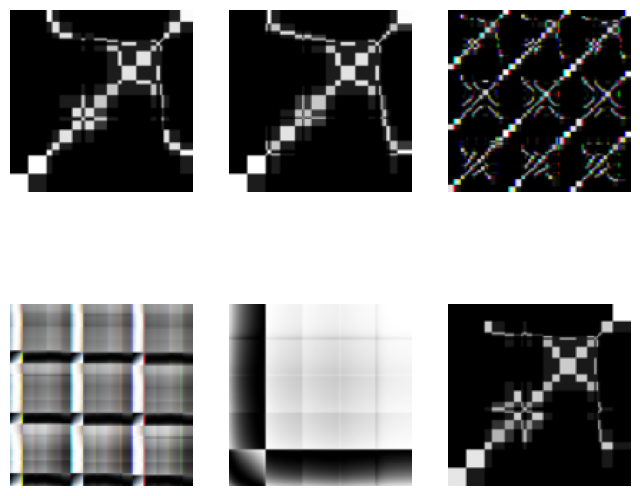

In [22]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = original_data_x[i]
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image/255)
    plt.axis("off")

# **Data Augmentation**



In [26]:
#cria cópias com rotação de 90 graus
rot_x = []
rot_y = []
for i in range(len(original_data_x)):
    rot_x.append(cv2.rotate(original_data_x[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
    rot_y.append(original_data_y[i])

In [27]:
#cria cópias com rotação de 90 graus
rot_x = []
rot_y = []
for i in range(len(original_data_x)):
    rot_x.append(cv2.rotate(original_data_x[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
    rot_y.append(original_data_y[i])

In [28]:
#cria cópias espelhadas horizontalmente
flip1_x = []
flip1_y = []
for i in range(len(original_data_x)):
    flip1_x.append(cv2.flip(original_data_x[i], 1))
    flip1_y.append(original_data_y[i])

In [29]:
#cria cópias espelhadas verticalmente
flip2_x = []
flip2_y = []
for i in range(len(original_data_x)):
    flip2_x.append(cv2.flip(original_data_x[i], 0))
    flip2_y.append(original_data_y[i])

In [30]:
#concatena as imagens formadas no array principal
new_data_x = [*original_data_x,*rot_x,*flip1_x, *flip2_x]
new_data_y = [*original_data_y,*rot_y,*flip1_y, *flip2_y]

# **Random Flip and Rotate**

In [32]:
from keras import layers

In [33]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

In [34]:
random_flip_images_x = []
random_flip_images_y = []
for i in range(len(original_data_x)):
    image = original_data_x[i]
    label = original_data_y[i]
    random_flip_images_x.append(image)
    random_flip_images_y.append(label)
    for j in range(6):
        augmented_image = data_augmentation(image)
        random_flip_images_x.append(augmented_image)
        random_flip_images_y.append(label)

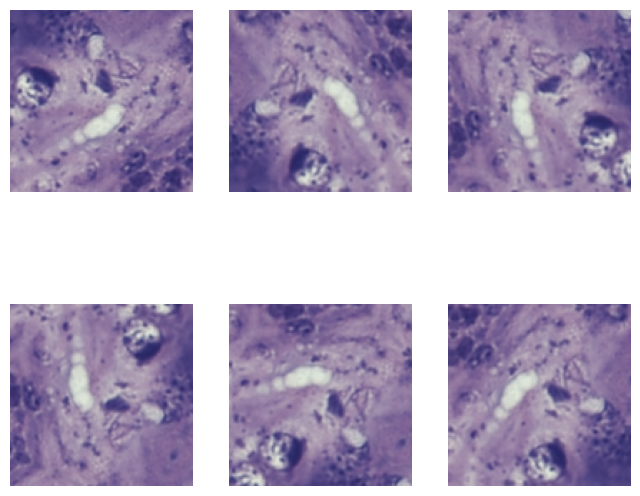

In [39]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = random_flip_images_x[i]
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image/255)
    plt.axis("off")

In [37]:
print('random_x size:', len(random_flip_images_x))
print('random label size:', len(random_flip_images_y))

random_x size: 4144
random label size: 4144


In [40]:
print('Data_x size:', len(new_data_x))
print('Data label size:', len(new_data_y))

Data_x size: 2368
Data label size: 2368


In [41]:
import pandas as pd

In [42]:
pd.Series(new_data_y).value_counts()

0    592
1    592
2    592
3    592
Name: count, dtype: int64

In [43]:
# fig = plt.figure(figsize=(5, 5))
# for i in range(1, (old_img_height//new_img_height)*(old_img_width//new_img_width)+1):
#     fig.add_subplot((old_img_height//new_img_height), (old_img_width//new_img_width), i)
#     #im = np.transpose(data_x[i - 1], (2, 0, 1))
#     #im = data_x[i-1]
#     plt.imshow(data_x[i-1])
#     plt.axis('off')
#     fig.tight_layout(pad=0.2)

In [45]:
#shuffling the final dataset
new_data_x, new_data_y = shuffle_dataset(new_data_x, new_data_y)

In [46]:
random_flip_images_x, random_flip_images_y = shuffle_dataset(random_flip_images_x, random_flip_images_y)

In [47]:
len(new_data_x), len(new_data_y)

(2368, 2368)

In [48]:
pd.Series(new_data_y).value_counts()

3    592
1    592
2    592
0    592
Name: count, dtype: int64

In [49]:
np.save('fractal_data_x_aumentated.npy', new_data_x)
np.save('fractal_data_y_aumentated.npy', new_data_y)

In [50]:
new_data_x = [i/255.0 for i in new_data_x]
np.save('fractal_data_x_aumentated_normalized.npy', new_data_x)
np.save('fractal_data_y_aumentated_normalized.npy', new_data_y)

In [51]:
random_flip_images_x = [i/255.0 for i in random_flip_images_x]
np.save('fractal_data_x_random_flip.npy', random_flip_images_x)
np.save('fractal_data_y_random_flip.npy', random_flip_images_y)